Create an Indian credit risk(default) model, using the data provided in the spreadsheet.
Dependent variable - We need to create a default variable which should take the value of 1 when net worth next year is negative & 0 when net worth next year is positive.
Validation Dataset -  We need to build the model on train dataset and check the model performance measures on validation dataset.

## TABLE OF CONTENTS:
 1   Networth_Next_Year                              
 2   Total_assets                                    
 3   Net_worth                                       
 4   Total_income                                    
 5   Change_in_stock                                 
 6   Total_expenses                                  
 7   Profit_after_tax                                
 8   PBDITA                                          
 9   PBT                                             
 10  Cash_profit                                     
 11  PBDITA_as_perc_of_total_income                  
 12  PBT_as_perc_of_total_income                     
 13  PAT_as_perc_of_total_income                     
 14  Cash_profit_as_perc_of_total_income             
 15  PAT_as_perc_of_net_worth                        
 16  Sales                                           
 17  Income_from_fincial_services                    
 18  Other_income                                    
 19  Total_capital                                   
 20  Reserves_and_funds                              
 21  Borrowings                                      
 22  Current_liabilities_and_provisions              
 23  Deferred_tax_liability                          
 24  Shareholders_funds                              
 25  Cumulative_retained_profits                     
 26  Capital_employed                                
 27  TOL_to_TNW                                      
 28  Total_term_liabilities__to__tangible_net_worth  
 29  Contingent_liabilities__to__Net_worth_perc      
 30  Contingent_liabilities                          
 31  Net_fixed_assets                                
 32  Investments                                     
 33  Current_assets                                  
 34  Net_working_capital                             
 35  Quick_ratio_times                               
 36  Current_ratio_times                             
 37  Debt_to_equity_ratio_times                      
 38  Cash_to_current_liabilities_times               
 39  Cash_to_average_cost_of_sales_per_day           
 40  Creditors_turnover                              
 41  Debtors_turnover                                
 42  Finished_goods_turnover                         
 43  WIP_turnover                                    
 44  Raw_material_turnover                           
 45  Shares_outstanding                              
 46  Equity_face_value                               
 47  EPS                                             
 48  Adjusted_EPS                                    
 49  Total_liabilities                               
 50  PE_on_BSE       


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Downloads/FRA Pending project/Company(FRA).csv")
pd.options.display.max_columns = None
df.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,Cash profit,PBDITA as % of total income,PBT as % of total income,PAT as % of total income,Cash profit as % of total income,PAT as % of net worth,Sales,Income from fincial services,Other income,Total capital,Reserves and funds,Borrowings,Current liabilities & provisions,Deferred tax liability,Shareholders funds,Cumulative retained profits,Capital employed,TOL/TNW,Total term liabilities / tangible net worth,Contingent liabilities / Net worth (%),Contingent liabilities,Net fixed assets,Investments,Current assets,Net working capital,Quick ratio (times),Current ratio (times),Debt to equity ratio (times),Cash to current liabilities (times),Cash to average cost of sales per day,Creditors turnover,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,395.3,827.6,336.5,534.1,13.5,508.7,38.9,124.4,64.6,95.2,23.29,12.10,7.28,17.82,12.27,533.5,0.6,NaN,87.6,249.0,390.7,43.9,56.4,336.5,248.9,727.2,1.28,0.99,186.21,626.6,461.1,18.1,257.6,163.1,0.99,2.52,1.16,0.06,5.41,11.60,5.65,3.99,3.37,14.87,8760056.0,10.0,4.44,4.44,827.6,NaN
1,2,36.2,67.7,24.3,137.9,-3.7,131.0,3.2,5.5,1.0,3.8,3.99,0.73,2.32,2.76,0.00,135.5,NaN,0.2,11.9,4.3,16.6,23.7,3.1,24.3,-8.2,40.9,1.53,0.21,47.74,11.6,18.5,0.2,39.0,3.9,0.67,1.11,0.68,0.02,1.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,67.7,NaN
2,3,84.0,238.4,78.9,331.2,-18.1,309.2,3.9,25.8,10.5,9.4,7.79,3.17,1.18,2.84,5.07,330.6,0.6,NaN,25.0,56.7,44.7,102.2,9.8,78.9,53.1,123.6,1.70,0.33,30.42,24.0,56.8,0.2,158.3,38.3,1.11,1.31,0.57,0.19,26.42,2.24,2.51,17.67,8.76,8.35,NaN,NaN,0.00,0.00,238.4,NaN
3,4,2041.4,6883.5,1443.3,8448.5,212.2,8482.4,178.3,418.4,185.1,178.0,4.95,2.19,2.11,2.11,13.17,8444.2,2.0,NaN,100.0,1343.3,2789.3,2650.8,0.1,1443.3,593.3,4232.6,3.69,0.22,10.79,155.7,8.6,NaN,6576.4,1455.1,0.99,1.28,1.93,0.07,15.93,3.48,1.91,18.14,18.62,11.11,10000000.0,10.0,17.60,17.60,6883.5,NaN
4,5,41.8,90.9,47.0,388.6,3.4,392.7,-0.7,7.2,-0.6,3.9,1.85,-0.15,-0.18,1.00,-1.48,387.6,0.2,0.8,10.7,35.8,25.5,14.1,4.3,47.0,35.8,72.5,0.81,0.44,0.00,NaN,36.3,NaN,39.8,20.8,0.35,2.09,0.54,0.05,0.85,21.67,68.00,45.87,28.67,19.93,107315.0,100.0,-6.52,-6.52,90.9,NaN


In [3]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_').str.replace('&', 'and')

In [4]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 4256 
The number of columns (variables) is 51


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4256 entries, 0 to 4255
Data columns (total 51 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             4256 non-null   int64  
 1   Networth_Next_Year                              4256 non-null   float64
 2   Total_assets                                    4256 non-null   float64
 3   Net_worth                                       4256 non-null   float64
 4   Total_income                                    4025 non-null   float64
 5   Change_in_stock                                 3706 non-null   float64
 6   Total_expenses                                  4091 non-null   float64
 7   Profit_after_tax                                4102 non-null   float64
 8   PBDITA                                          4102 non-null   float64
 9   PBT                                      

In [6]:
df.duplicated().sum()

0

In [7]:
df.drop('Num', axis = 1, inplace = True)

In [8]:
df['default'] = np.where((df['Networth_Next_Year'] > 0), 0, 1)
df[['default','Networth_Next_Year']].head()

,default,Networth_Next_Year
0,0,395.3
1,0,36.2
2,0,84.0
3,0,2041.4
4,0,41.8


In [9]:
df['default'].value_counts()

0    3352
1     904
Name: default, dtype: int64

In [10]:
df['default'].value_counts(normalize=True)

0    0.787594
1    0.212406
Name: default, dtype: float64

In [11]:
df.isnull().sum()

Networth_Next_Year                                   0
Total_assets                                         0
Net_worth                                            0
Total_income                                       231
Change_in_stock                                    550
Total_expenses                                     165
Profit_after_tax                                   154
PBDITA                                             154
PBT                                                154
Cash_profit                                        154
PBDITA_as_perc_of_total_income                      79
PBT_as_perc_of_total_income                         79
PAT_as_perc_of_total_income                         79
Cash_profit_as_perc_of_total_income                 79
PAT_as_perc_of_net_worth                             0
Sales                                              305
Income_from_fincial_services                      1111
Other_income                                      1556
Total_capi

<Figure size 432x288 with 0 Axes>

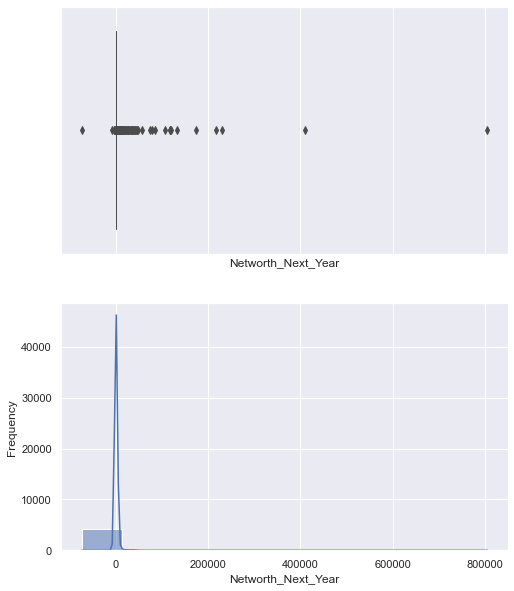

<Figure size 576x720 with 0 Axes>

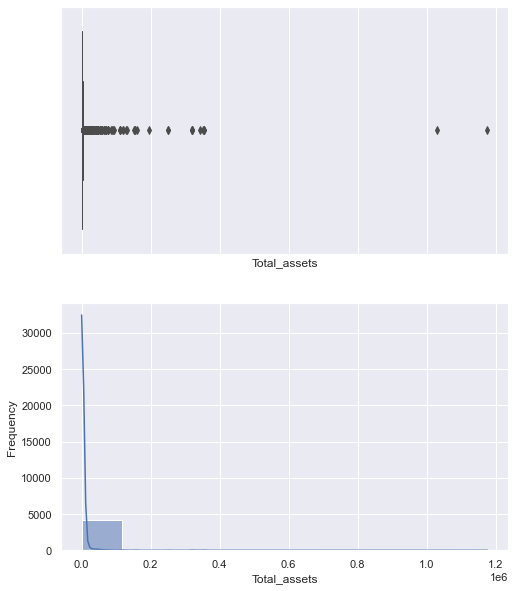

<Figure size 576x720 with 0 Axes>

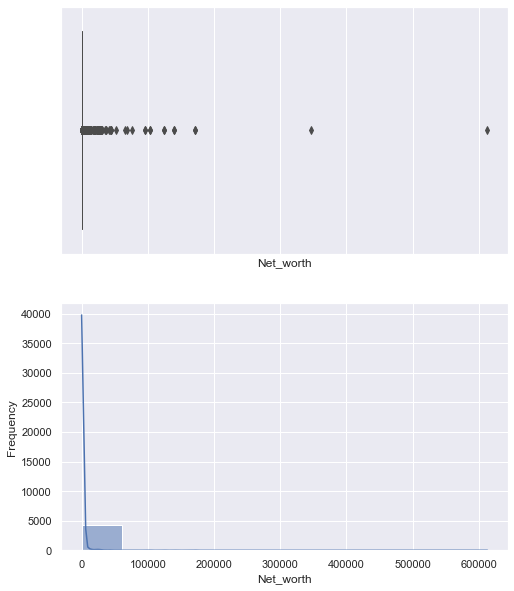

<Figure size 576x720 with 0 Axes>

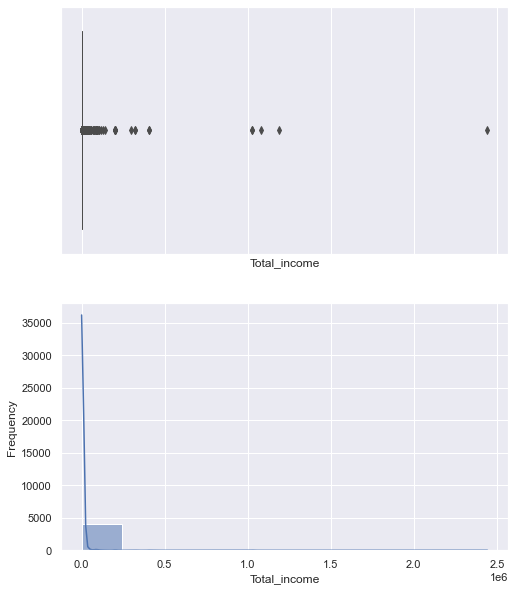

<Figure size 576x720 with 0 Axes>

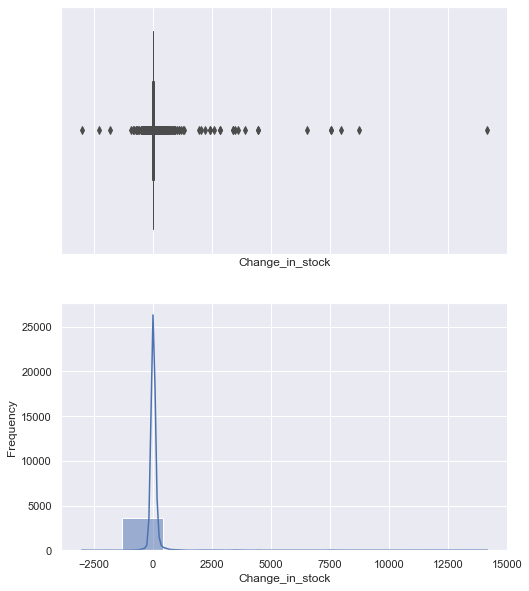

<Figure size 576x720 with 0 Axes>

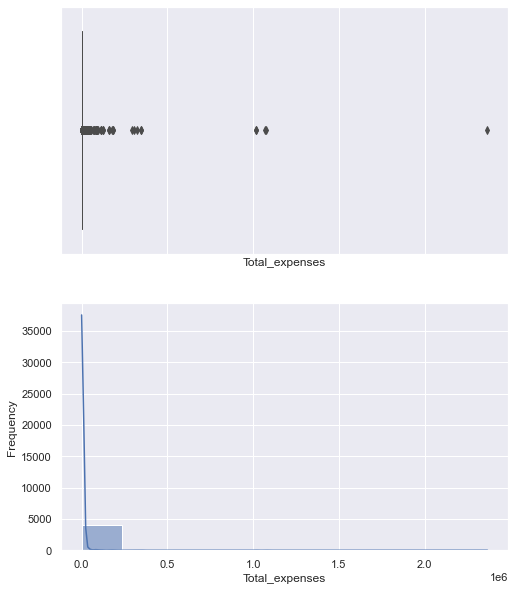

<Figure size 576x720 with 0 Axes>

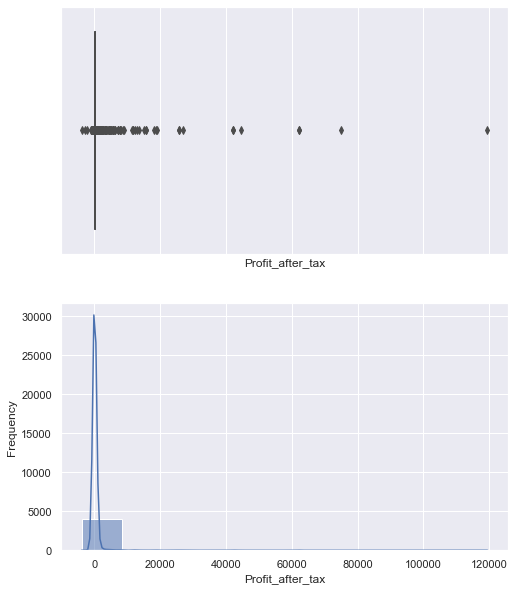

<Figure size 576x720 with 0 Axes>

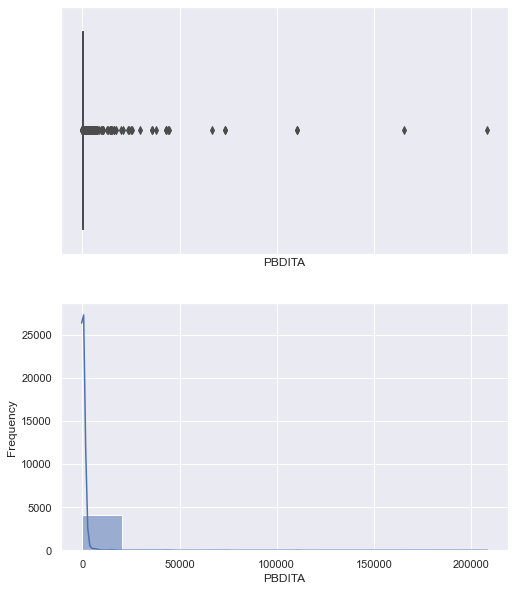

<Figure size 576x720 with 0 Axes>

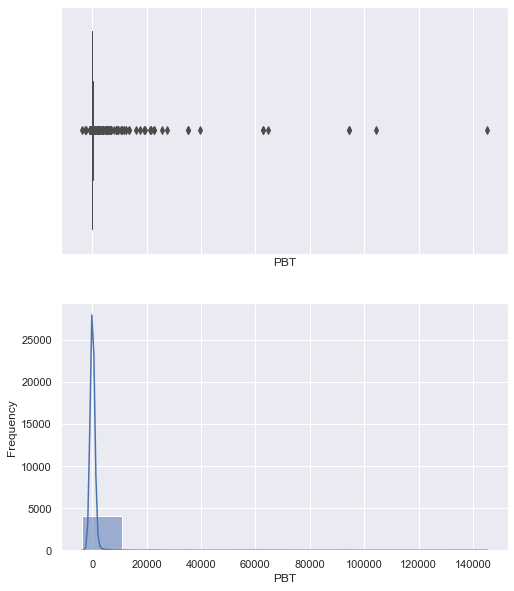

<Figure size 576x720 with 0 Axes>

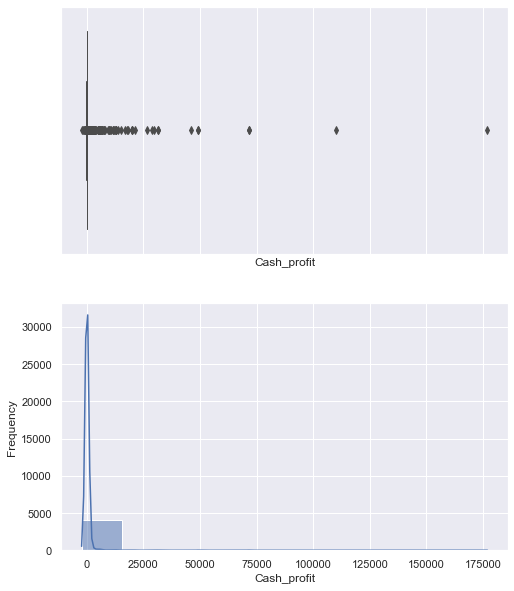

<Figure size 576x720 with 0 Axes>

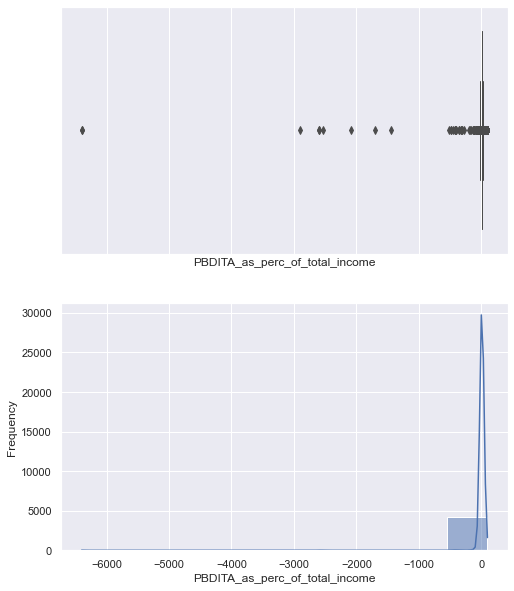

<Figure size 576x720 with 0 Axes>

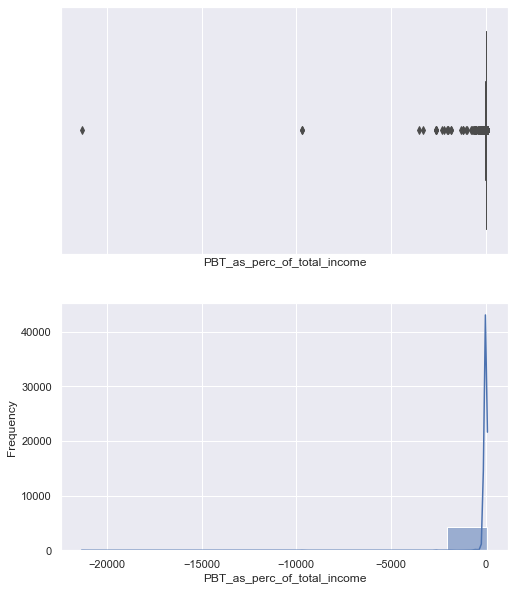

<Figure size 576x720 with 0 Axes>

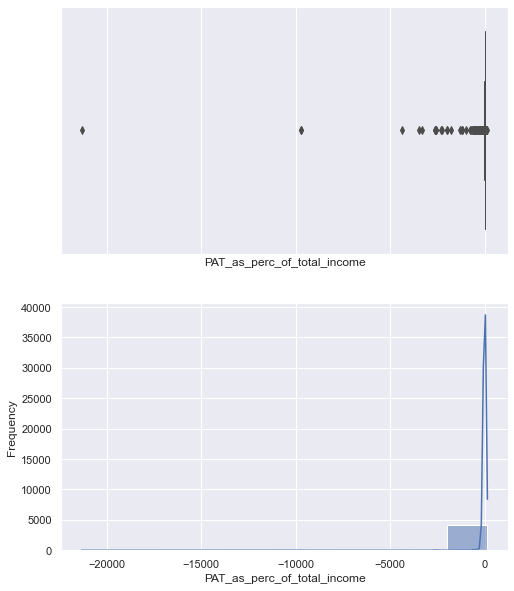

<Figure size 576x720 with 0 Axes>

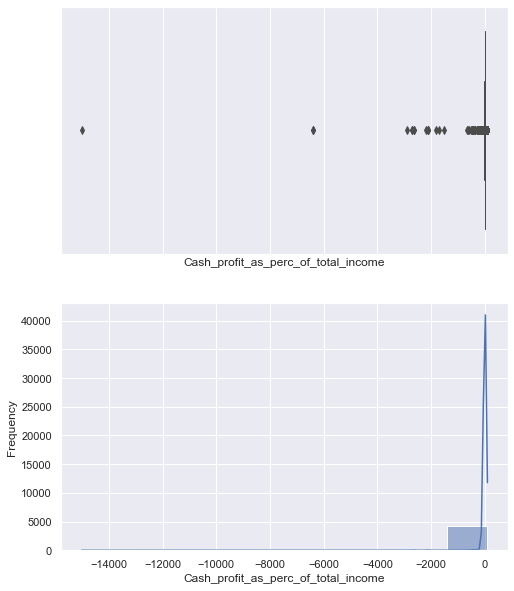

<Figure size 576x720 with 0 Axes>

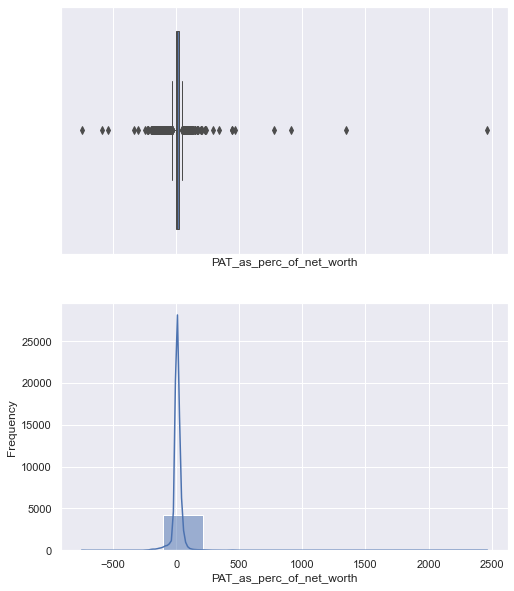

<Figure size 576x720 with 0 Axes>

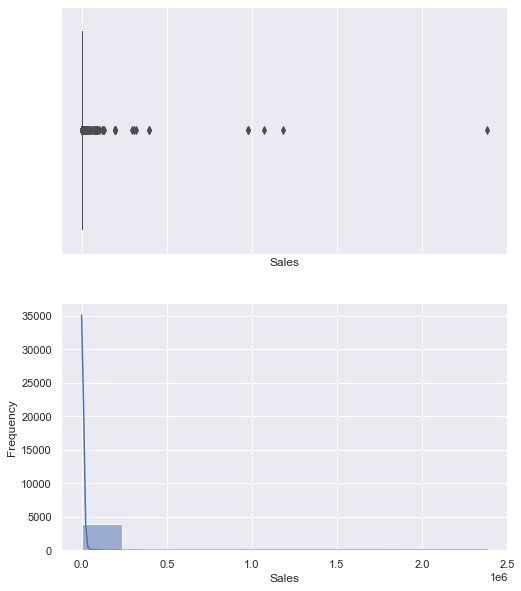

<Figure size 576x720 with 0 Axes>

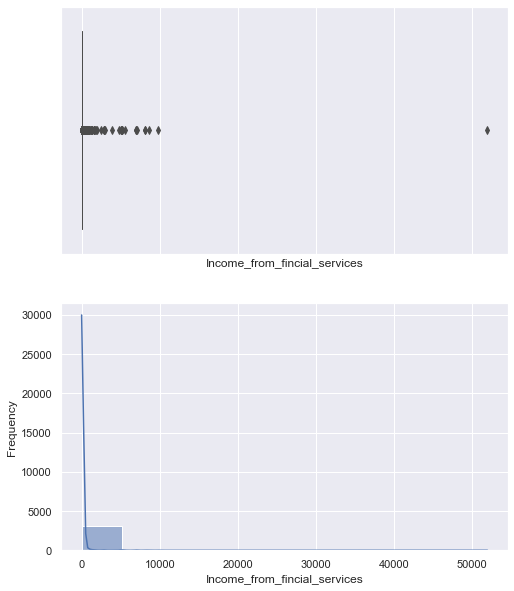

<Figure size 576x720 with 0 Axes>

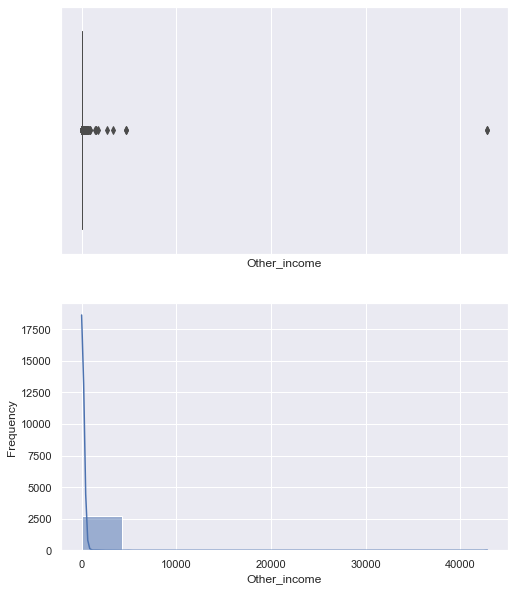

<Figure size 576x720 with 0 Axes>

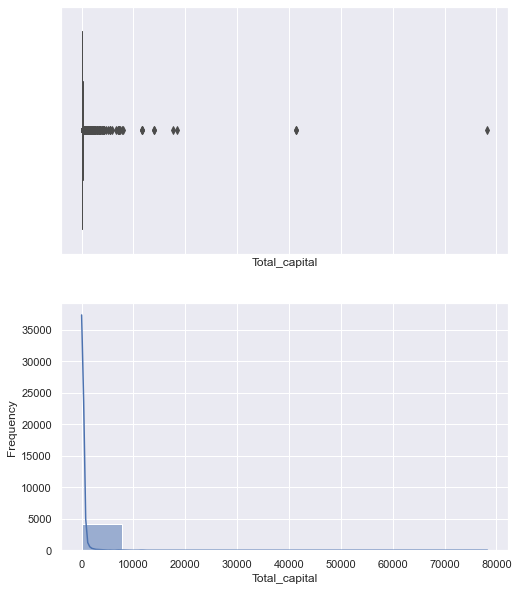

<Figure size 576x720 with 0 Axes>

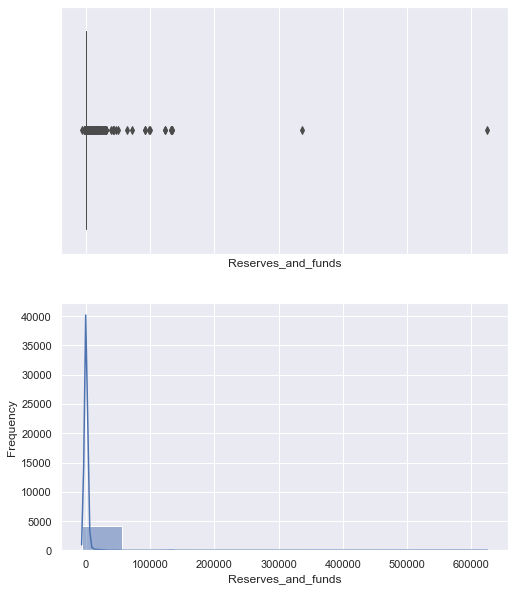

<Figure size 576x720 with 0 Axes>

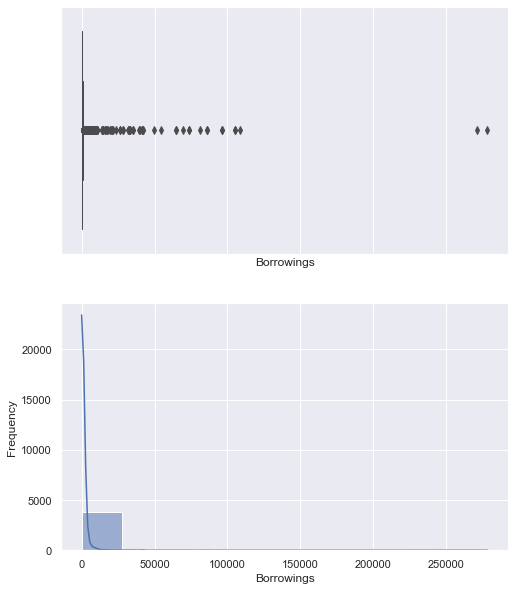

<Figure size 576x720 with 0 Axes>

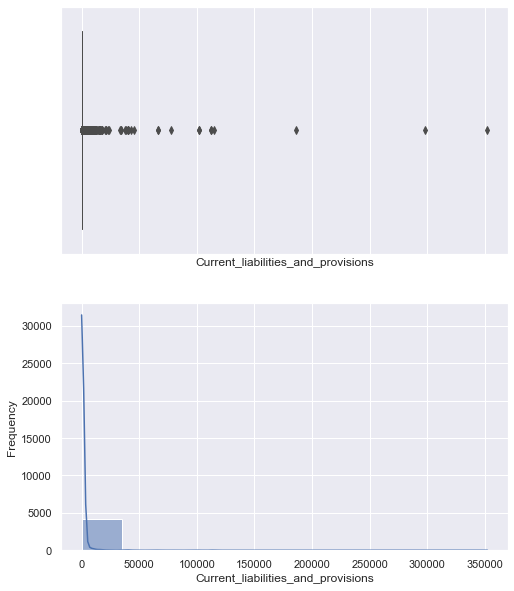

<Figure size 576x720 with 0 Axes>

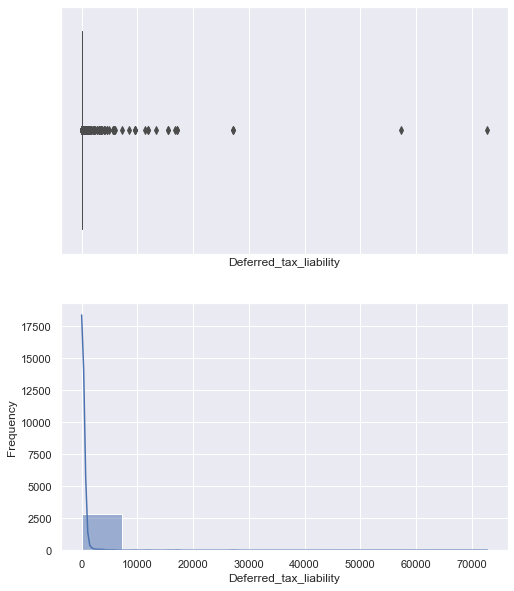

<Figure size 576x720 with 0 Axes>

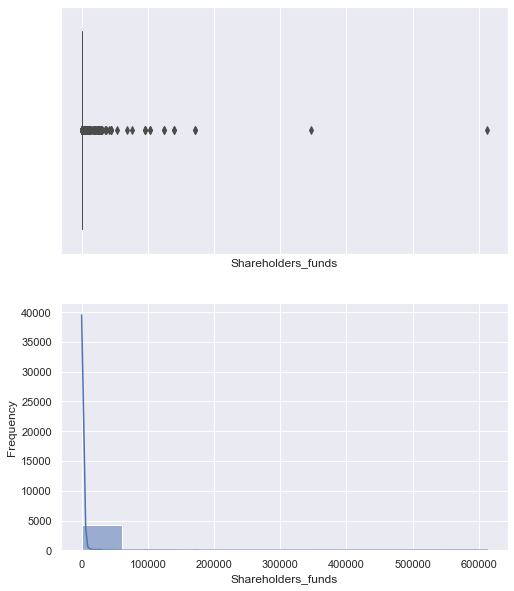

<Figure size 576x720 with 0 Axes>

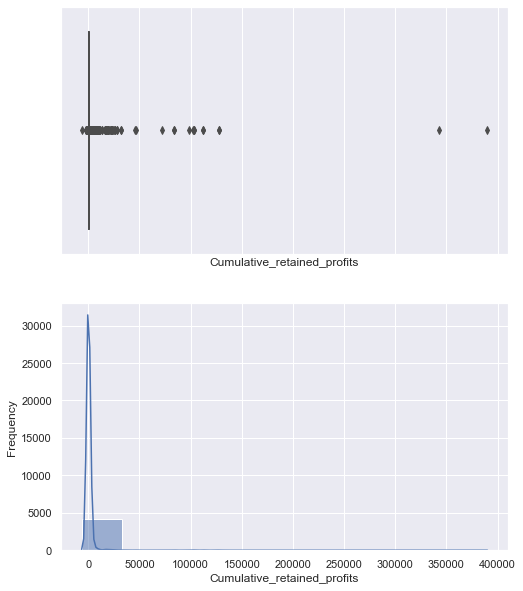

<Figure size 576x720 with 0 Axes>

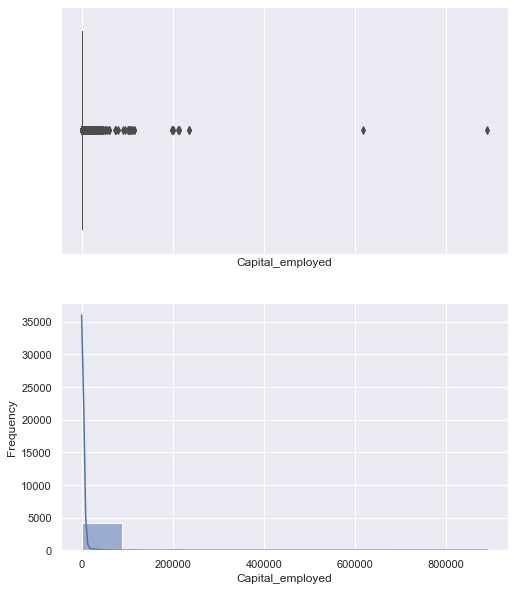

<Figure size 576x720 with 0 Axes>

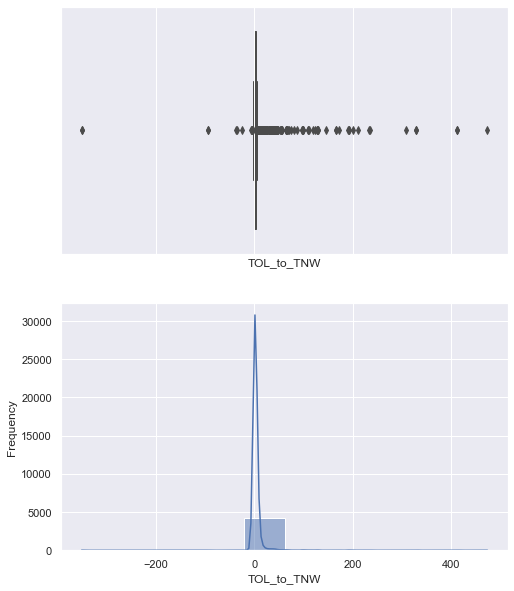

<Figure size 576x720 with 0 Axes>

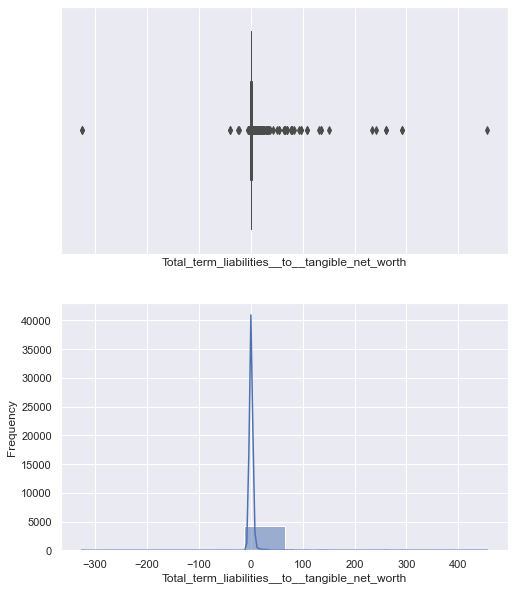

<Figure size 576x720 with 0 Axes>

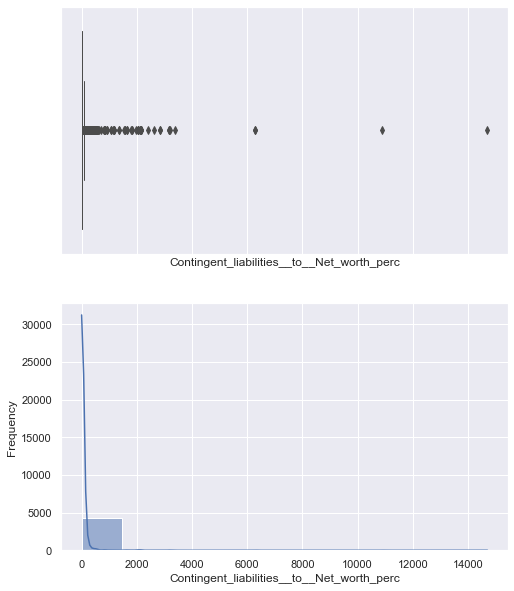

<Figure size 576x720 with 0 Axes>

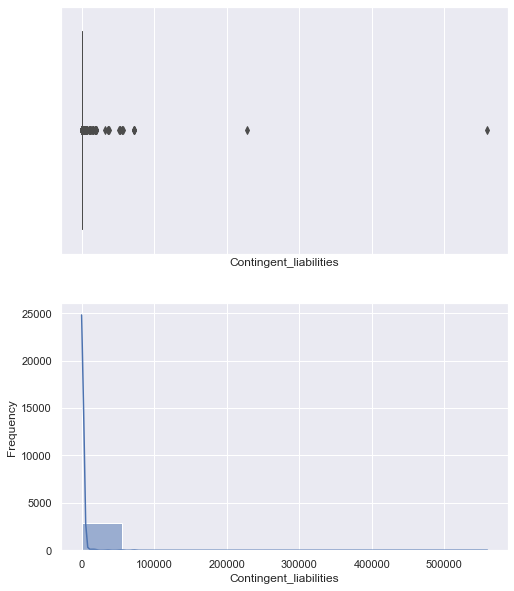

<Figure size 576x720 with 0 Axes>

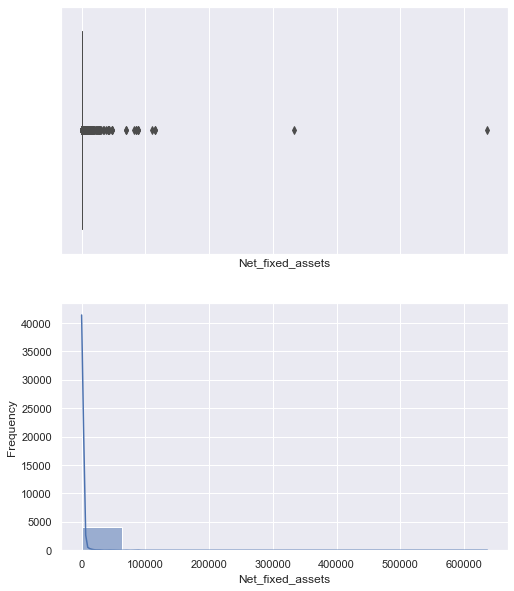

<Figure size 576x720 with 0 Axes>

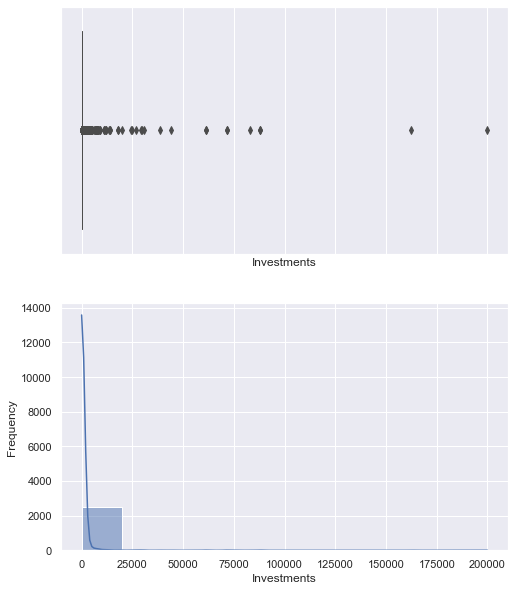

<Figure size 576x720 with 0 Axes>

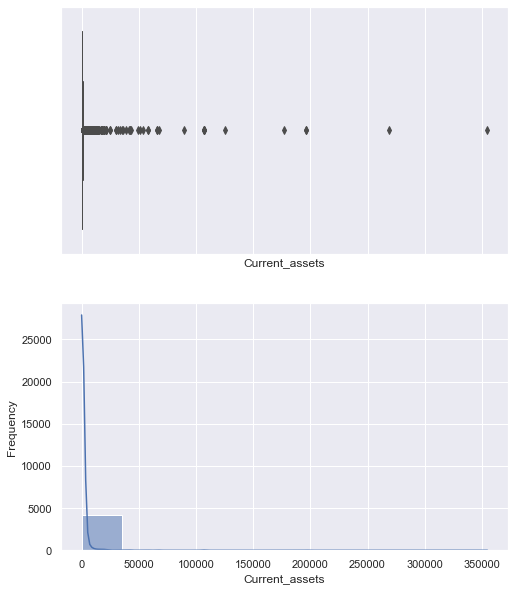

<Figure size 576x720 with 0 Axes>

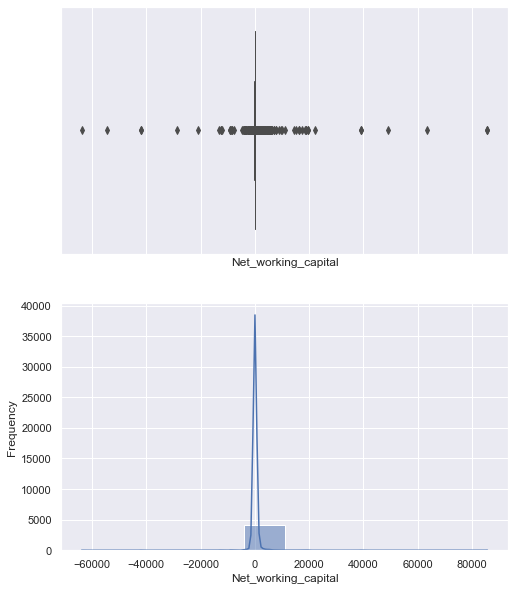

<Figure size 576x720 with 0 Axes>

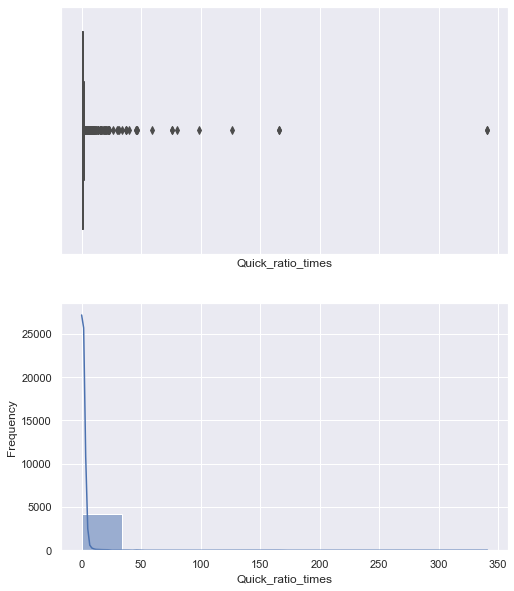

<Figure size 576x720 with 0 Axes>

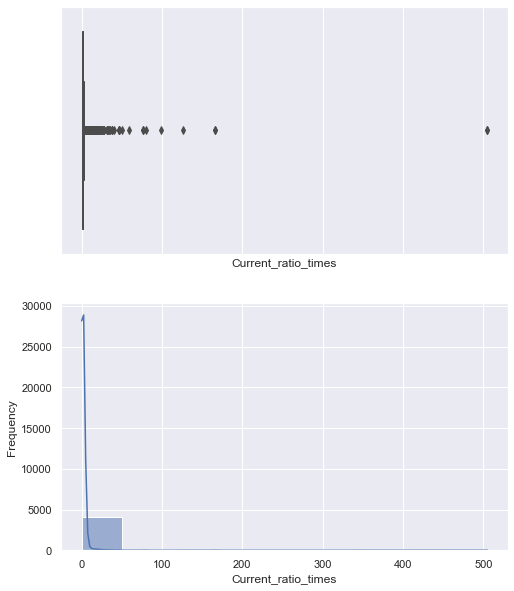

<Figure size 576x720 with 0 Axes>

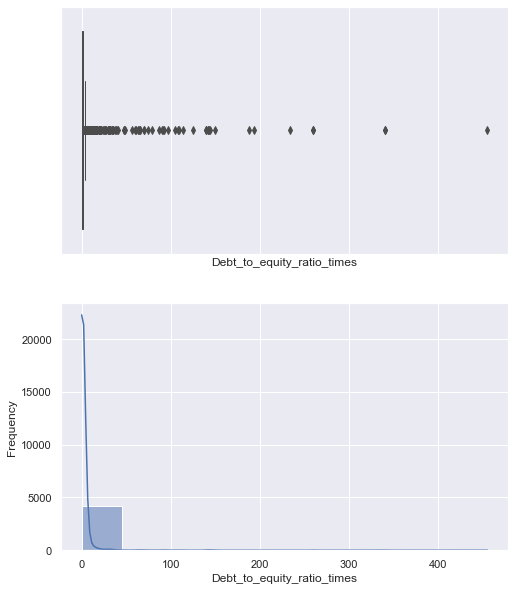

<Figure size 576x720 with 0 Axes>

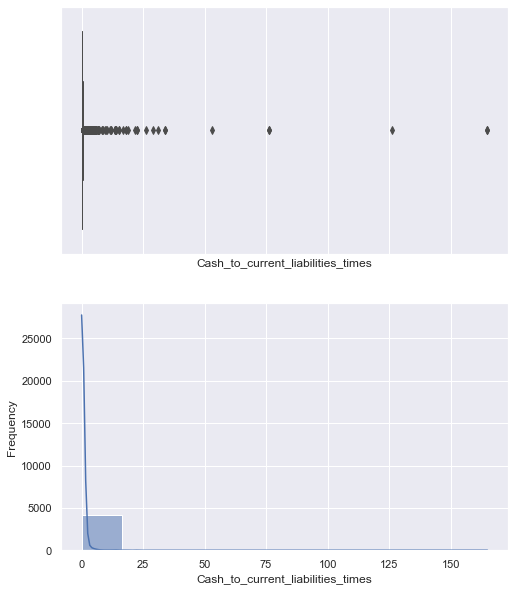

<Figure size 576x720 with 0 Axes>

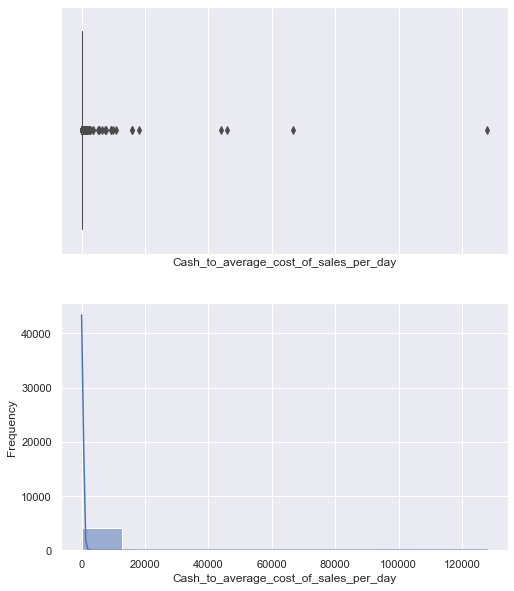

<Figure size 576x720 with 0 Axes>

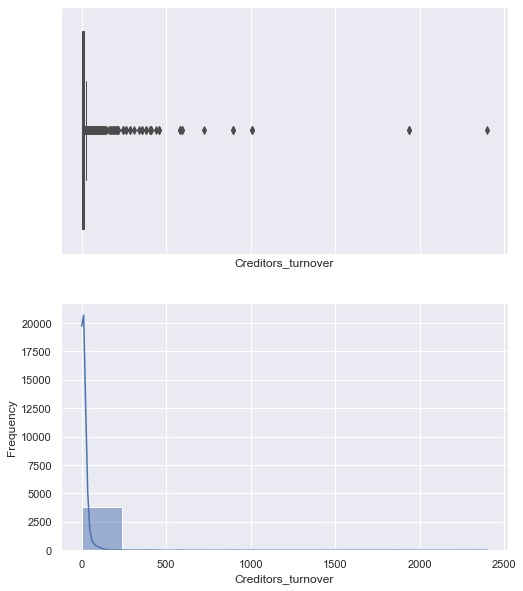

<Figure size 576x720 with 0 Axes>

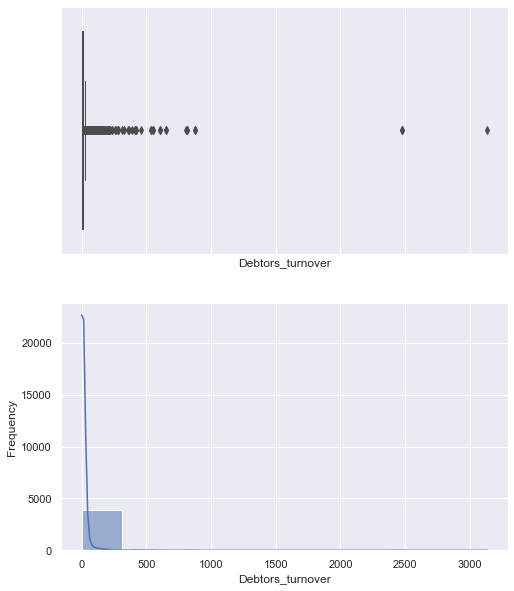

<Figure size 576x720 with 0 Axes>

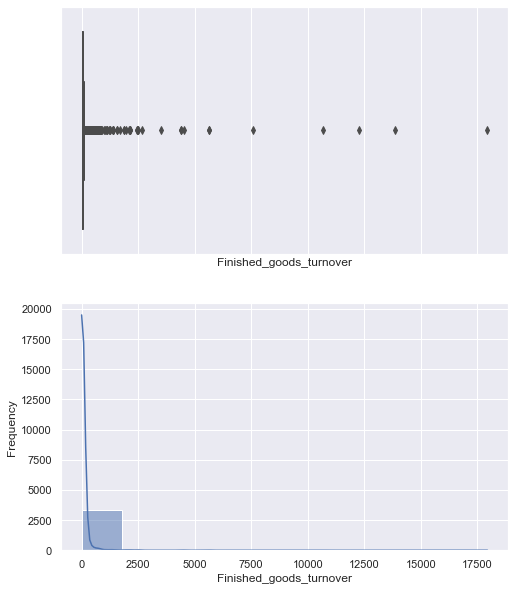

<Figure size 576x720 with 0 Axes>

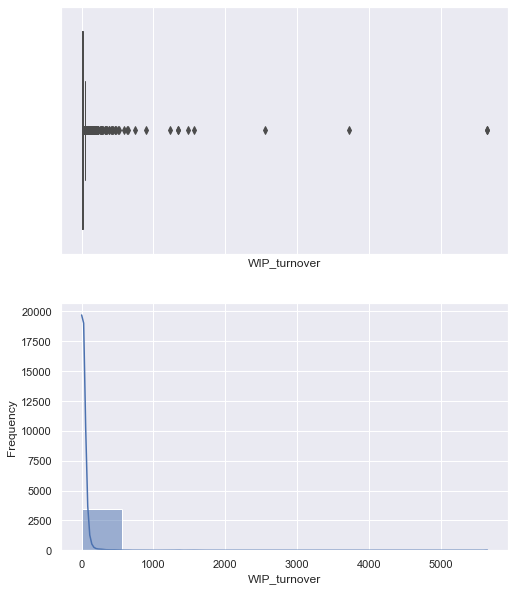

<Figure size 576x720 with 0 Axes>

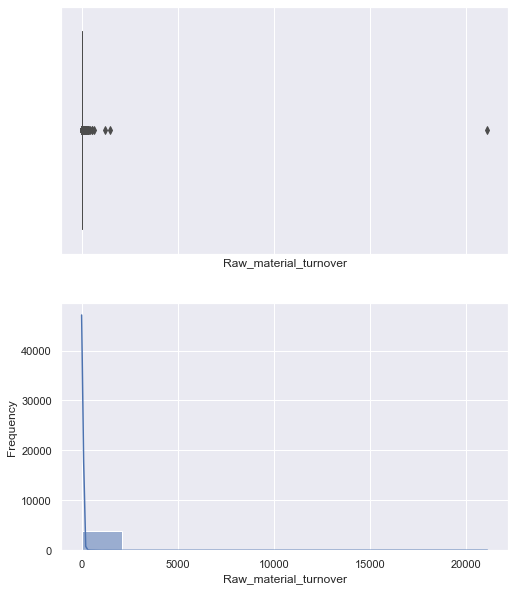

<Figure size 576x720 with 0 Axes>

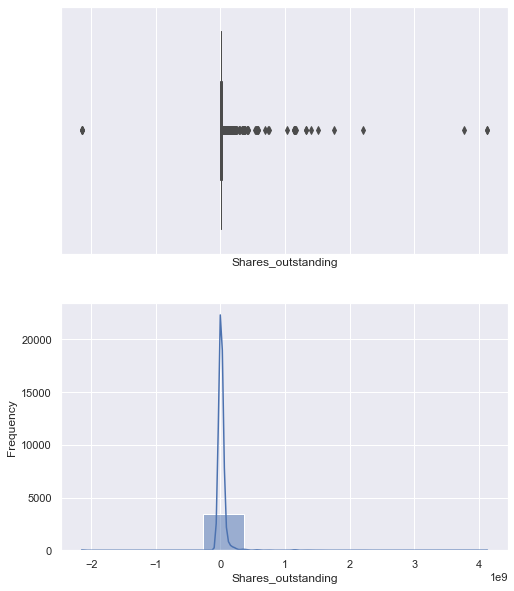

<Figure size 576x720 with 0 Axes>

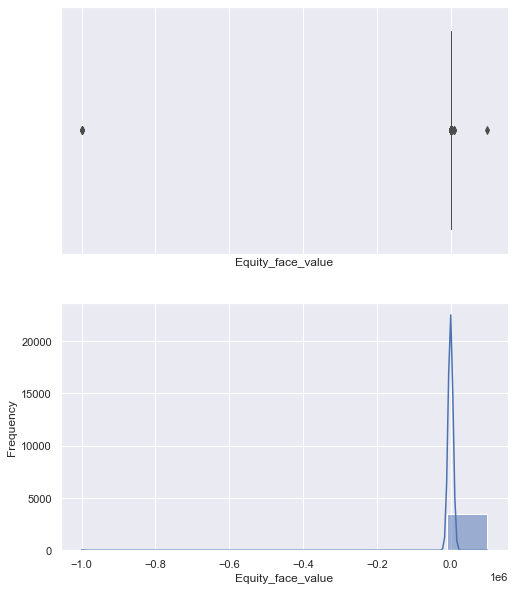

<Figure size 576x720 with 0 Axes>

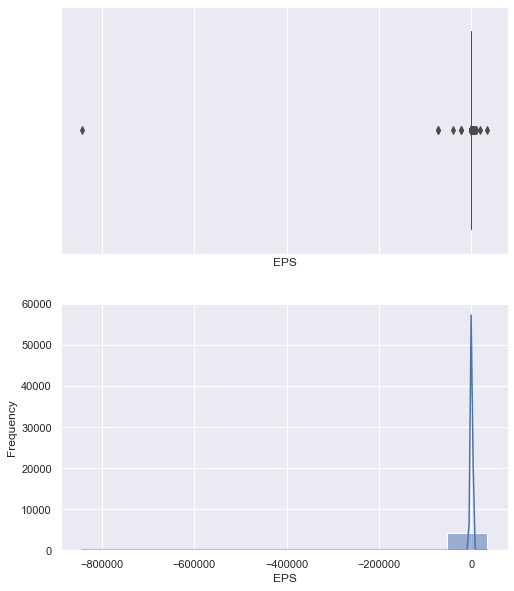

<Figure size 576x720 with 0 Axes>

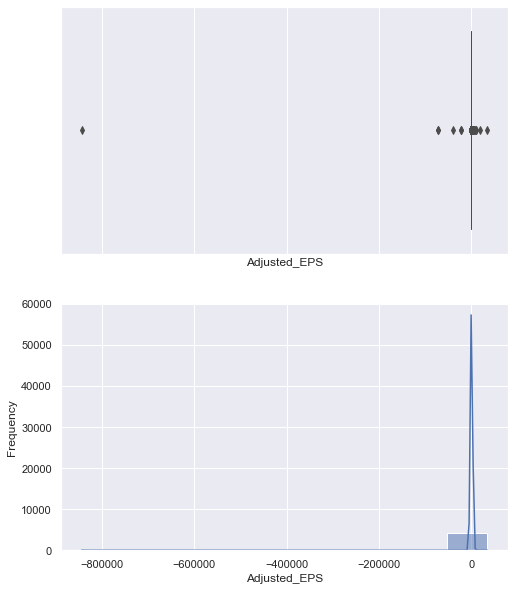

<Figure size 576x720 with 0 Axes>

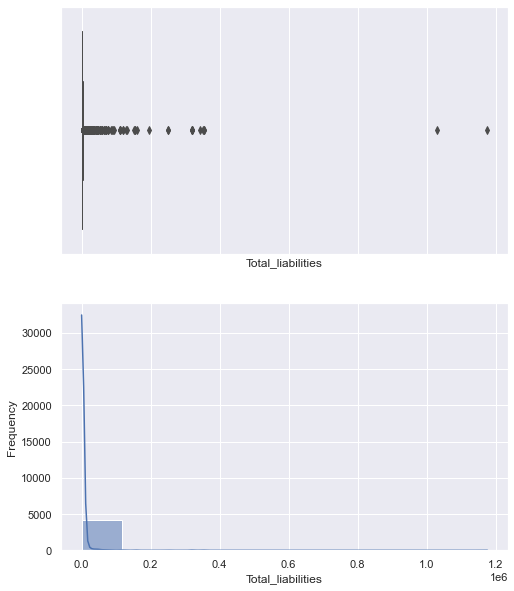

<Figure size 576x720 with 0 Axes>

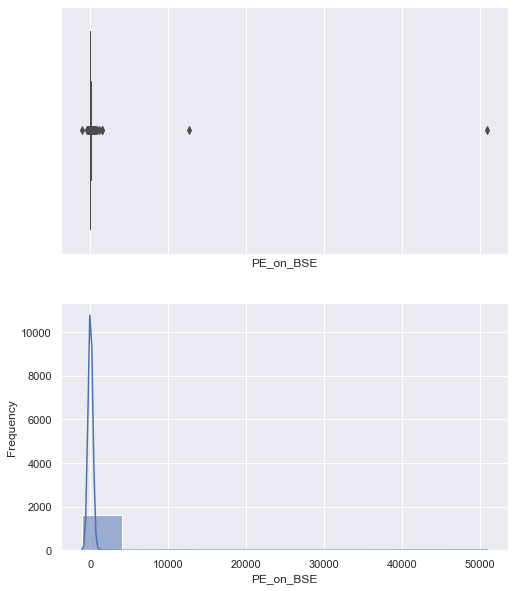

<Figure size 576x720 with 0 Axes>

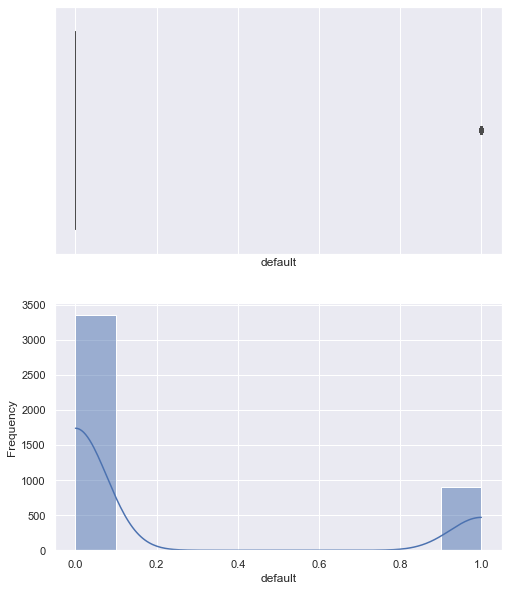

In [12]:
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 10)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True);

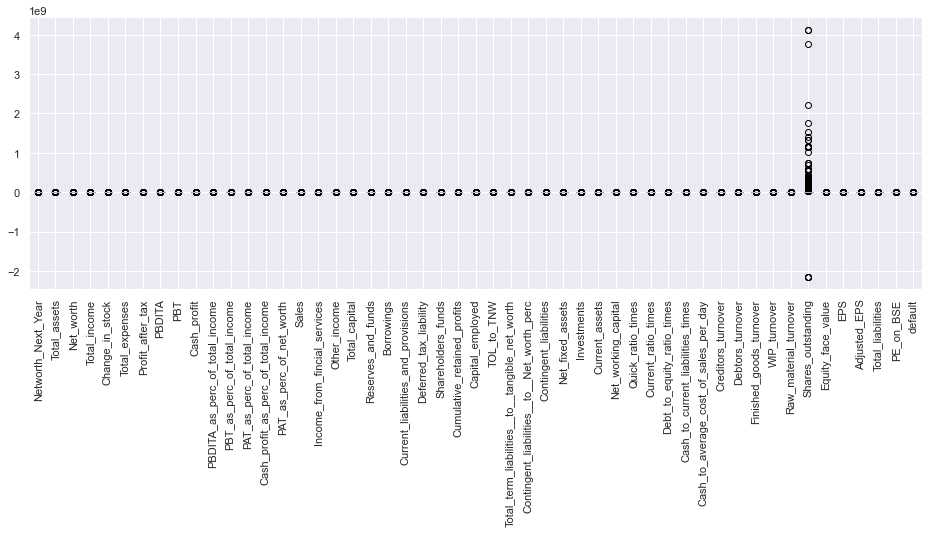

In [13]:
# Checking Outliers in dataset
df.boxplot(figsize=(16,5))
plt.xticks(rotation=90)
plt.show()

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Networth_Next_Year,4256.0,1.344741e+03,1.593674e+04,-7.426560e+04,3.975,72.100,3.308250e+02,8.057734e+05
Total_assets,4256.0,3.573617e+03,3.007444e+04,1.000000e-01,91.300,315.500,1.120800e+03,1.176509e+06
Net_worth,4256.0,1.351950e+03,1.296131e+04,0.000000e+00,31.475,104.800,3.898500e+02,6.131516e+05
Total_income,4025.0,4.688190e+03,5.391895e+04,0.000000e+00,107.100,455.100,1.485000e+03,2.442828e+06
Change_in_stock,3706.0,4.370248e+01,4.369150e+02,-3.029400e+03,-1.800,1.600,1.840000e+01,1.418550e+04
Total_expenses,4091.0,4.356301e+03,5.139809e+04,-1.000000e-01,96.800,426.800,1.395700e+03,2.366035e+06
Profit_after_tax,4102.0,2.950506e+02,3.079902e+03,-3.908300e+03,0.500,9.000,5.330000e+01,1.194391e+05
PBDITA,4102.0,6.059406e+02,5.646231e+03,-4.407000e+02,6.925,36.900,1.587000e+02,2.085765e+05
PBT,4102.0,4.102590e+02,4.217415e+03,-3.894800e+03,0.800,12.600,7.417500e+01,1.452926e+05
Cash_profit,4102.0,4.082675e+02,4.143926e+03,-2.245700e+03,2.900,19.400,9.625000e+01,1.769118e+05


In [15]:
df.drop('default', axis=1).isnull().sum().sort_values(ascending = False)/df.index.size

PE_on_BSE                                         0.617246
Investments                                       0.402961
Other_income                                      0.365602
Contingent_liabilities                            0.329417
Deferred_tax_liability                            0.321664
Income_from_fincial_services                      0.261043
Finished_goods_turnover                           0.205357
Shares_outstanding                                0.190320
Equity_face_value                                 0.190320
WIP_turnover                                      0.179511
Change_in_stock                                   0.129229
Borrowings                                        0.101269
Raw_material_turnover                             0.100564
Creditors_turnover                                0.091870
Debtors_turnover                                  0.090461
Sales                                             0.071664
Total_income                                      0.0542

In [16]:
df.drop(["PE_on_BSE","Investments","Other_income","Contingent_liabilities","Deferred_tax_liability"], axis=1, inplace=True)
df.shape

(4256, 46)

In [17]:
df1 = df.drop('default', axis=1)
df1[df1==0] = np.nan
(df1==0).sum()
(df1==0).shape
df1.shape

(4256, 45)

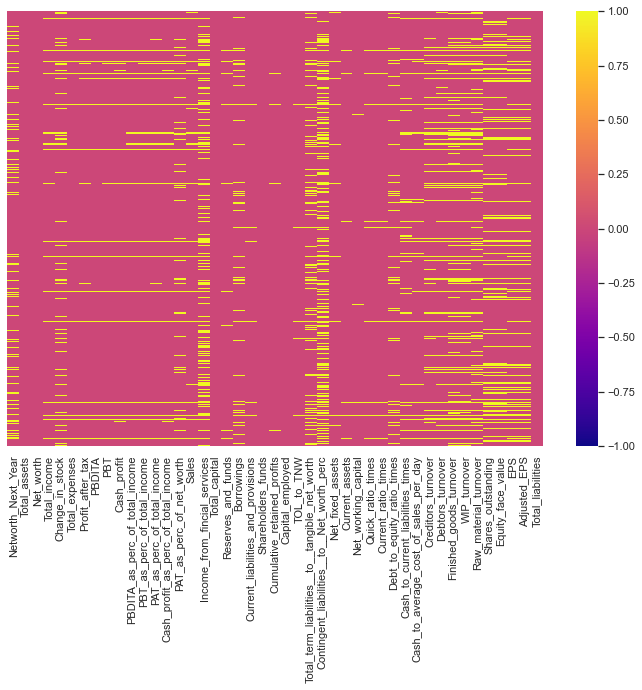

In [18]:
plt.figure(figsize = (12,8))
sns.heatmap(df1.isnull(),cmap = 'plasma', yticklabels = False, vmin = -1, vmax= 1)
plt.show();

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_x = pd.DataFrame(sc.fit_transform(df1), columns=df1.columns)
scaled_x.head()

,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,PBT_as_perc_of_total_income,PAT_as_perc_of_total_income,Cash_profit_as_perc_of_total_income,PAT_as_perc_of_net_worth,Sales,Income_from_fincial_services,Total_capital,Reserves_and_funds,Borrowings,Current_liabilities_and_provisions,Shareholders_funds,Cumulative_retained_profits,Capital_employed,TOL_to_TNW,Total_term_liabilities__to__tangible_net_worth,Contingent_liabilities__to__Net_worth_perc,Net_fixed_assets,Current_assets,Net_working_capital,Quick_ratio_times,Current_ratio_times,Debt_to_equity_ratio_times,Cash_to_current_liabilities_times,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities
0,-0.069211,-0.091318,-0.078369,-0.077077,-0.070705,-0.074926,-0.084231,-0.086259,-0.083062,-0.076597,0.113271,0.072572,0.065317,0.088817,0.009651,-0.077480,-0.077473,-0.081292,-0.075105,-0.091554,-0.100305,-0.079958,-0.070035,-0.083283,-0.134218,-0.071755,0.230098,-0.059981,-0.107615,-0.000111,-0.056682,0.018685,-0.124955,-0.102710,-0.056889,-0.079411,-0.145096,-0.143121,-0.149709,-0.013946,-0.087771,0.032403,0.016791,0.016903,-0.091318
1,-0.089911,-0.116588,-0.102456,-0.084424,-0.109617,-0.082271,-0.095714,-0.107167,-0.098002,-0.098472,0.003751,0.046196,0.053912,0.039795,NaN,-0.084979,NaN,-0.126225,-0.094189,-0.135155,-0.102515,-0.103954,-0.096095,-0.116767,-0.122363,-0.116527,-0.078828,-0.095356,-0.129143,-0.050060,-0.090711,-0.093652,-0.154077,-0.110728,-0.058356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.116588
2,-0.087155,-0.110912,-0.098244,-0.080840,-0.142194,-0.078806,-0.095489,-0.103597,-0.095770,-0.097132,0.025315,0.051856,0.051291,0.040056,-0.099959,-0.081303,-0.077473,-0.118449,-0.090102,-0.131880,-0.093926,-0.099757,-0.089882,-0.112732,-0.114301,-0.109639,-0.117469,-0.092295,-0.117394,-0.039267,-0.043922,-0.077718,-0.160751,-0.076652,-0.048757,-0.199909,-0.178842,-0.118839,-0.118008,-0.031869,NaN,NaN,NaN,NaN,-0.110912
3,0.025675,0.110069,0.007023,0.069688,0.378820,0.080135,-0.039393,-0.034560,-0.054757,-0.056781,0.009199,0.049583,0.053429,0.037679,0.023352,0.071570,-0.076131,-0.073932,0.010238,0.187999,0.184931,0.005110,-0.035127,0.087743,-0.019933,-0.115953,-0.161264,-0.096148,0.514660,0.405246,-0.056682,-0.080108,-0.078238,-0.100706,-0.052817,-0.183945,-0.185290,-0.118005,-0.060018,-0.024282,-0.080518,0.032403,0.017709,0.017821,0.110069
4,-0.089588,-0.115817,-0.100705,-0.079775,-0.093554,-0.077182,-0.096968,-0.106868,-0.098378,-0.098448,-0.008392,0.044155,0.048164,0.034066,-0.199673,-0.080229,-0.077857,-0.126937,-0.091732,-0.134118,-0.103566,-0.102209,-0.091635,-0.115225,-0.156506,-0.103325,NaN,-0.093934,-0.129064,-0.044757,-0.124739,-0.015574,-0.162571,-0.104715,-0.058654,0.050227,0.524983,-0.068783,-0.000911,-0.000035,-0.138386,0.035043,0.016026,0.016138,-0.115817


In [20]:
df1['default'] = df['default']

In [21]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(imputer.fit_transform(df1), columns = df1.columns)

df_imputed.isnull().sum()

Networth_Next_Year                                0
Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Income_from_fincial_services                      0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings  

In [22]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [23]:
df_x = df_imputed.drop('default', axis=1)
df_y = df_imputed['default']

In [24]:
for column in df_x.columns:
    lr,ur=remove_outlier(df_x[column])
    df_x[column]=np.where(df_x[column]>ur,ur,df_x[column])
    df_x[column]=np.where(df_x[column]<lr,lr,df_x[column])

In [25]:
df = pd.concat([df_x, df_y], axis = 1)
df.head()

,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,Cash_profit,PBDITA_as_perc_of_total_income,PBT_as_perc_of_total_income,PAT_as_perc_of_total_income,Cash_profit_as_perc_of_total_income,PAT_as_perc_of_net_worth,Sales,Income_from_fincial_services,Total_capital,Reserves_and_funds,Borrowings,Current_liabilities_and_provisions,Shareholders_funds,Cumulative_retained_profits,Capital_employed,TOL_to_TNW,Total_term_liabilities__to__tangible_net_worth,Contingent_liabilities__to__Net_worth_perc,Net_fixed_assets,Current_assets,Net_working_capital,Quick_ratio_times,Current_ratio_times,Debt_to_equity_ratio_times,Cash_to_current_liabilities_times,Cash_to_average_cost_of_sales_per_day,Creditors_turnover,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,default
0,395.3000,827.60,336.5000,534.1,13.5000,508.700,38.90,124.400,64.6000,95.2,23.29,12.10,7.28,17.82,12.270,533.5000,0.60,87.6,249.0000,390.7,43.90,336.5,248.900,727.2,1.28,0.99,170.37125,461.1,257.6000,163.1000,0.99,2.52,1.16,0.06,5.41,11.600,5.65000,3.990,3.370,14.870,8760056.0,10.0,4.44000,4.44000,827.60,0.0
1,36.2000,67.70,24.3000,137.9,-3.7000,131.000,3.20,5.500,1.0000,3.8,3.99,0.73,2.32,2.76,17.492,135.5000,0.36,11.9,4.3000,16.6,23.70,24.3,-8.200,40.9,1.53,0.21,47.74000,18.5,39.0000,3.9000,0.67,1.11,0.68,0.02,1.62,20.962,10.68800,65.554,20.494,9.142,138261.0,10.0,31.88225,25.82375,67.70,0.0
2,84.0000,238.40,78.9000,331.2,-18.1000,309.200,3.90,25.800,10.5000,9.4,7.79,3.17,1.18,2.84,5.070,330.6000,0.60,25.0,56.7000,44.7,102.20,78.9,53.100,123.6,1.70,0.33,30.42000,56.8,158.3000,38.3000,1.11,1.31,0.57,0.19,26.42,2.240,2.51000,17.670,8.760,8.350,3378725.2,10.0,5.39000,5.39000,238.40,0.0
3,1121.2875,2665.05,927.4125,3388.8,38.6125,3227.275,127.65,365.575,177.3125,178.0,4.95,2.19,2.11,2.11,13.170,3302.4375,2.00,100.0,674.2875,800.6,616.05,973.8,505.275,1883.8,3.69,0.22,10.79000,8.6,1208.3375,215.7125,0.99,1.28,1.93,0.07,15.93,3.480,1.91000,18.140,18.620,11.110,10000000.0,10.0,17.60000,17.60000,2665.05,0.0
4,41.8000,90.90,47.0000,388.6,3.4000,392.700,-0.70,7.200,-0.6000,3.9,1.85,-0.15,-0.18,1.00,-1.480,387.6000,0.20,10.7,35.8000,25.5,14.10,47.0,35.800,72.5,0.81,0.44,131.69400,36.3,39.8000,20.8000,0.35,2.09,0.54,0.05,0.85,21.670,24.50875,45.870,28.670,19.930,107315.0,10.0,-6.52000,-6.52000,90.90,0.0


In [26]:
df.shape

(4256, 46)

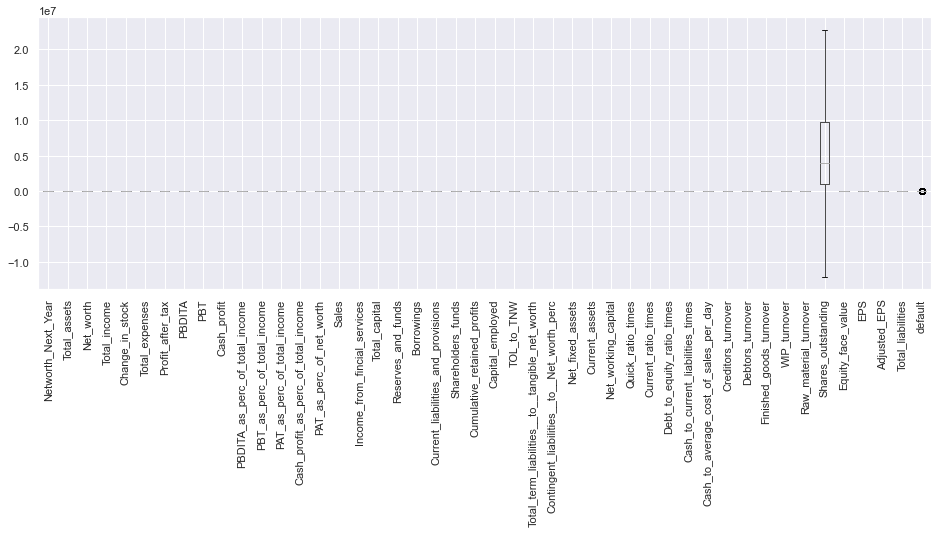

In [27]:
# Checking Outliers in dataset
df.boxplot(figsize=(16,5))
plt.xticks(rotation=90)
plt.show()

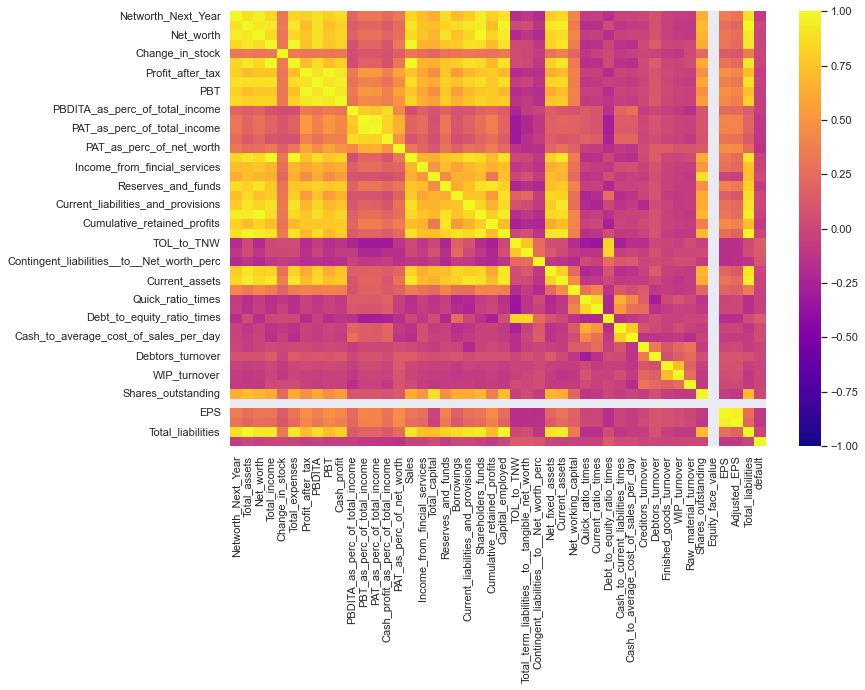

In [28]:
plt.figure(figsize=(12,8))
p=sns.heatmap(df.corr(),cmap='plasma', vmin = -1, vmax= 1)

Here, we can see that lots of variables have collinearity in them so we would be using VIF method to find those significant variables which are of use to us

In [29]:
import statsmodels.formula.api as SM

In [30]:
df.columns

Index(['Networth_Next_Year', 'Total_assets', 'Net_worth', 'Total_income',
       'Change_in_stock', 'Total_expenses', 'Profit_after_tax', 'PBDITA',
       'PBT', 'Cash_profit', 'PBDITA_as_perc_of_total_income',
       'PBT_as_perc_of_total_income', 'PAT_as_perc_of_total_income',
       'Cash_profit_as_perc_of_total_income', 'PAT_as_perc_of_net_worth',
       'Sales', 'Income_from_fincial_services', 'Total_capital',
       'Reserves_and_funds', 'Borrowings',
       'Current_liabilities_and_provisions', 'Shareholders_funds',
       'Cumulative_retained_profits', 'Capital_employed', 'TOL_to_TNW',
       'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_perc', 'Net_fixed_assets',
       'Current_assets', 'Net_working_capital', 'Quick_ratio_times',
       'Current_ratio_times', 'Debt_to_equity_ratio_times',
       'Cash_to_current_liabilities_times',
       'Cash_to_average_cost_of_sales_per_day', 'Creditors_turnover',
       'Debtors_turnover',

In [31]:
f_1 = 'default ~ Total_assets + Net_worth + Total_income + Change_in_stock + Total_expenses + Profit_after_tax + PBDITA + PBT + Cash_profit + PBDITA_as_perc_of_total_income + PBT_as_perc_of_total_income + PAT_as_perc_of_total_income + Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Sales + Total_capital + Reserves_and_funds + Borrowings + Current_liabilities_and_provisions + Shareholders_funds + Cumulative_retained_profits + Capital_employed + TOL_to_TNW + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Net_fixed_assets + Current_assets + Net_working_capital + Quick_ratio_times + Current_ratio_times + Debt_to_equity_ratio_times + Cash_to_current_liabilities_times + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + WIP_turnover + Raw_material_turnover + EPS + Adjusted_EPS + Total_liabilities'

In [32]:
model_1 = SM.logit(formula = f_1, data=df).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.491731
         Iterations 16


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 4256
Model:                          Logit   Df Residuals:                     4214
Method:                           MLE   Df Model:                           41
Date:                Fri, 20 Jan 2023   Pseudo R-squ.:                 0.04911
Time:                        20:48:31   Log-Likelihood:                -2092.8
converged:                       True   LL-Null:                       -2200.9
Covariance Type:            nonrobust   LLR p-value:                 1.174e-25
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -1.5818      0.201     -7.853      0.000      -1.977      -1.187
Total_assets                                       0.0003        nan        nan        nan         nan         nan
Net_worth                                          0.0003      0.001      0.371      0.711      -0.001       0.002
Total_income                                       0.0001      0.001      0.209      0.834      -0.001       0.001
Change_in_stock                                   -0.0002      0.003     -0.096      0.923      -0.005       0.005
Total_expenses                                     0.0008      0.001      1.422      0.155      -0.000       0.002
Profit_after_tax                                   0.0036      0.005      0.674      0.500      -0.007       0.014
PBDITA                                            -0.0005      0.001     -0.349      0.727      -0.003       0.002
PBT                                                0.0018      0.004      0.452      0.651      -0.006       0.010
Cash_profit                                       -0.0012      0.002     -0.616      0.538      -0.005       0.003
PBDITA_as_perc_of_total_income                     0.0098      0.009      1.082      0.279      -0.008       0.027
PBT_as_perc_of_total_income                       -0.0076      0.023     -0.328      0.743      -0.053       0.038
PAT_as_perc_of_total_income                        0.0252      0.032      0.801      0.423      -0.037       0.087
Cash_profit_as_perc_of_total_income               -0.0269      0.013     -1.995      0.046      -0.053      -0.000
PAT_as_perc_of_net_worth                          -0.0160      0.003     -4.680      0.000      -0.023      -0.009
Sales                                             -0.0008      0.001     -1.096      0.273      -0.002       0.001
Total_capital                                      0.0004      0.001      0.433      0.665      -0.001       0.002
Reserves_and_funds                                -0.0009      0.000     -1.857      0.063      -0.002    4.84e-05
Borrowings                                        -0.0006      0.000     -1.414      0.157      -0.001       0.000
Current_liabilities_and_provisions                -0.0002      0.001     -0.227      0.821      -0.002       0.001
Shareholders_funds                                 0.0007      0.001      0.823      0.411      -0.001       0.002
Cumulative_retained_profits                       -0.0003      0.001     -0.495      0.621      -0.001       0.001
Capital_employed                                  -0.0005      0.000     -1.020      0.308      -0.001       0.000
TOL_to_TNW                                         0.0598      0.023      2.594      0.009       0.015       0.105
Total_term_liabilities__to__tangible_net_worth    -0.0235      0.091     -0.258      0.796      -0.202       0.155
Contingent_liabilitie

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [34]:
X = df_x.copy()
f = calc_vif(X).sort_values(by = 'VIF', ascending = False)
f

,variables,VIF
44,Total_liabilities,inf
1,Total_assets,inf
3,Total_income,284.013129
15,Sales,266.758949
5,Total_expenses,194.518168
21,Shareholders_funds,123.102097
2,Net_worth,117.923232
23,Capital_employed,83.532451
8,PBT,54.425917
6,Profit_after_tax,51.723265


In [35]:
import time
start = time.time()

for i in range(55):
    v = calc_vif(X).sort_values(by = 'VIF', ascending = False)
    if (v.iloc[0,1] > 5):
        X = X.drop(columns=v.iloc[0,0])

end = time.time()
print('Time taken =', end-start)

Time taken = 10.147852420806885


In [36]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
9,Quick_ratio_times,4.641107
4,Borrowings,4.503532
12,Debtors_turnover,3.601846
11,Creditors_turnover,3.586279
3,Income_from_fincial_services,3.456780
5,Cumulative_retained_profits,3.434983
15,Shares_outstanding,3.425728
14,Raw_material_turnover,3.231177
1,Cash_profit_as_perc_of_total_income,2.605220
10,Cash_to_average_cost_of_sales_per_day,2.600104


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
y = df['default']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 12)

In [40]:
Default_train = pd.concat([X_train, y_train], axis = 1)
Default_test = pd.concat([X_test, y_test], axis = 1)

In [41]:
from imblearn.over_sampling import SMOTE 

In [42]:
sm = SMOTE(random_state=33, sampling_strategy = 0.75)
X_res, y_res = sm.fit_resample(X, y)
df_new_smote = pd.concat([X_res, y_res], axis = 1)

In [43]:
train = pd.concat([X_train, y_train], axis = 1)
train_smote = pd.concat([X_res, y_res], axis = 1)
test = pd.concat([X_test, y_test], axis = 1)

In [44]:
X_train.columns

Index(['Change_in_stock', 'Cash_profit_as_perc_of_total_income',
       'PAT_as_perc_of_net_worth', 'Income_from_fincial_services',
       'Borrowings', 'Cumulative_retained_profits',
       'Total_term_liabilities__to__tangible_net_worth',
       'Contingent_liabilities__to__Net_worth_perc', 'Net_working_capital',
       'Quick_ratio_times', 'Cash_to_average_cost_of_sales_per_day',
       'Creditors_turnover', 'Debtors_turnover', 'Finished_goods_turnover',
       'Raw_material_turnover', 'Shares_outstanding', 'Adjusted_EPS'],
      dtype='object')

In [45]:
model_2 = SM.logit(formula = 'default ~ Change_in_stock + Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Income_from_fincial_services + Borrowings + Cumulative_retained_profits + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Net_working_capital + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Finished_goods_turnover + Raw_material_turnover + Shares_outstanding + Adjusted_EPS', data=train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.651336
         Iterations 5


In [46]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 5866
Model:                          Logit   Df Residuals:                     5848
Method:                           MLE   Df Model:                           17
Date:                Fri, 20 Jan 2023   Pseudo R-squ.:                 0.04623
Time:                        20:48:43   Log-Likelihood:                -3820.7
converged:                       True   LL-Null:                       -4005.9
Covariance Type:            nonrobust   LLR p-value:                 2.792e-68
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -0.5413      0.097     -5.573      0.000      -0.732      -0.351
Change_in_stock                                    0.0024      0.002      1.366      0.172      -0.001       0.006
Cash_profit_as_perc_of_total_income               -0.0174      0.004     -4.261      0.000      -0.025      -0.009
PAT_as_perc_of_net_worth                          -0.0093      0.002     -4.598      0.000      -0.013      -0.005
Income_from_fincial_services                       0.0066      0.007      0.928      0.354      -0.007       0.021
Borrowings                                        -0.0003      0.000     -1.759      0.079      -0.001    3.36e-05
Cumulative_retained_profits                       -0.0003      0.000     -1.508      0.132      -0.001    9.62e-05
Total_term_liabilities__to__tangible_net_worth     0.2871      0.040      7.106      0.000       0.208       0.366
Contingent_liabilities__to__Net_worth_perc         0.0025      0.001      4.651      0.000       0.001       0.004
Net_working_capital                                0.0004      0.000      1.022      0.307      -0.000       0.001
Quick_ratio_times                                 -0.1134      0.064     -1.767      0.077      -0.239       0.012
Cash_to_average_cost_of_sales_per_day              0.0043      0.001      2.968      0.003       0.001       0.007
Creditors_turnover                                 0.0034      0.004      0.776      0.438      -0.005       0.012
Debtors_turnover                                   0.0023      0.005      0.466      0.641      -0.007       0.012
Finished_goods_turnover                            0.0003      0.001      0.250      0.803      -0.002       0.002
Raw_material_turnover                             -0.0026      0.004     -0.609      0.543      -0.011       0.006
Shares_outstanding                              1.759e-08   5.03e-09      3.499      0.000    7.74e-09    2.74e-08
Adjusted_EPS                                      -0.0072      0.003     -2.064      0.039      -0.014      -0.000
==================================================================================================================
"""

here, we can see that Finished_goods_turnover has the highest value so its going to be removed.

In [47]:
model_3 = SM.logit(formula = 'default ~ Change_in_stock + Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Income_from_fincial_services + Borrowings + Cumulative_retained_profits + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Net_working_capital + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Creditors_turnover + Debtors_turnover + Raw_material_turnover + Shares_outstanding + Adjusted_EPS', data=train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.651341
         Iterations 5


In [48]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 5866
Model:                          Logit   Df Residuals:                     5849
Method:                           MLE   Df Model:                           16
Date:                Fri, 20 Jan 2023   Pseudo R-squ.:                 0.04622
Time:                        20:48:43   Log-Likelihood:                -3820.8
converged:                       True   LL-Null:                       -4005.9
Covariance Type:            nonrobust   LLR p-value:                 5.872e-69
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -0.5353      0.094     -5.687      0.000      -0.720      -0.351
Change_in_stock                                    0.0024      0.002      1.352      0.176      -0.001       0.006
Cash_profit_as_perc_of_total_income               -0.0175      0.004     -4.286      0.000      -0.026      -0.009
PAT_as_perc_of_net_worth                          -0.0093      0.002     -4.611      0.000      -0.013      -0.005
Income_from_fincial_services                       0.0067      0.007      0.940      0.347      -0.007       0.021
Borrowings                                        -0.0003      0.000     -1.780      0.075      -0.001       3e-05
Cumulative_retained_profits                       -0.0003      0.000     -1.512      0.131      -0.001    9.53e-05
Total_term_liabilities__to__tangible_net_worth     0.2873      0.040      7.112      0.000       0.208       0.366
Contingent_liabilities__to__Net_worth_perc         0.0025      0.001      4.655      0.000       0.001       0.004
Net_working_capital                                0.0004      0.000      1.008      0.313      -0.000       0.001
Quick_ratio_times                                 -0.1129      0.064     -1.759      0.079      -0.239       0.013
Cash_to_average_cost_of_sales_per_day              0.0043      0.001      2.957      0.003       0.001       0.007
Creditors_turnover                                 0.0035      0.004      0.793      0.428      -0.005       0.012
Debtors_turnover                                   0.0022      0.005      0.461      0.645      -0.007       0.012
Raw_material_turnover                             -0.0025      0.004     -0.582      0.560      -0.011       0.006
Shares_outstanding                              1.761e-08   5.02e-09      3.505      0.000    7.76e-09    2.75e-08
Adjusted_EPS                                      -0.0072      0.003     -2.056      0.040      -0.014      -0.000
==================================================================================================================
"""

here,Creditors_turnover>0.05 will be removed

In [49]:
model_4 = SM.logit(formula = 'default ~ Change_in_stock + Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Income_from_fincial_services + Borrowings + Cumulative_retained_profits + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Net_working_capital + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Debtors_turnover + Raw_material_turnover + Shares_outstanding + Adjusted_EPS', data=train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.651395
         Iterations 5


In [50]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 5866
Model:                          Logit   Df Residuals:                     5850
Method:                           MLE   Df Model:                           15
Date:                Fri, 20 Jan 2023   Pseudo R-squ.:                 0.04615
Time:                        20:48:43   Log-Likelihood:                -3821.1
converged:                       True   LL-Null:                       -4005.9
Covariance Type:            nonrobust   LLR p-value:                 1.570e-69
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -0.5271      0.094     -5.635      0.000      -0.710      -0.344
Change_in_stock                                    0.0024      0.002      1.362      0.173      -0.001       0.006
Cash_profit_as_perc_of_total_income               -0.0175      0.004     -4.278      0.000      -0.025      -0.009
PAT_as_perc_of_net_worth                          -0.0093      0.002     -4.635      0.000      -0.013      -0.005
Income_from_fincial_services                       0.0064      0.007      0.909      0.363      -0.007       0.020
Borrowings                                        -0.0003      0.000     -1.747      0.081      -0.001    3.54e-05
Cumulative_retained_profits                       -0.0003      0.000     -1.517      0.129      -0.001    9.43e-05
Total_term_liabilities__to__tangible_net_worth     0.2855      0.040      7.079      0.000       0.206       0.365
Contingent_liabilities__to__Net_worth_perc         0.0025      0.001      4.668      0.000       0.001       0.004
Net_working_capital                                0.0004      0.000      1.129      0.259      -0.000       0.001
Quick_ratio_times                                 -0.0991      0.062     -1.605      0.109      -0.220       0.022
Cash_to_average_cost_of_sales_per_day              0.0040      0.001      2.859      0.004       0.001       0.007
Debtors_turnover                                   0.0037      0.004      0.821      0.412      -0.005       0.012
Raw_material_turnover                             -0.0018      0.004     -0.428      0.669      -0.010       0.006
Shares_outstanding                              1.735e-08   5.01e-09      3.462      0.001    7.53e-09    2.72e-08
Adjusted_EPS                                      -0.0073      0.003     -2.087      0.037      -0.014      -0.000
==================================================================================================================
"""

In [51]:
#here,Debtors_turnover>0.05

In [52]:
model_5 = SM.logit(formula = 'default ~ Change_in_stock + Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Income_from_fincial_services + Borrowings + Cumulative_retained_profits + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Net_working_capital + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Raw_material_turnover + Shares_outstanding + Adjusted_EPS', data=train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.651452
         Iterations 5


In [53]:
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 5866
Model:                          Logit   Df Residuals:                     5851
Method:                           MLE   Df Model:                           14
Date:                Fri, 20 Jan 2023   Pseudo R-squ.:                 0.04606
Time:                        20:48:43   Log-Likelihood:                -3821.4
converged:                       True   LL-Null:                       -4005.9
Covariance Type:            nonrobust   LLR p-value:                 4.145e-70
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -0.4962      0.086     -5.797      0.000      -0.664      -0.328
Change_in_stock                                    0.0023      0.002      1.285      0.199      -0.001       0.006
Cash_profit_as_perc_of_total_income               -0.0172      0.004     -4.233      0.000      -0.025      -0.009
PAT_as_perc_of_net_worth                          -0.0092      0.002     -4.598      0.000      -0.013      -0.005
Income_from_fincial_services                       0.0067      0.007      0.944      0.345      -0.007       0.021
Borrowings                                        -0.0003      0.000     -1.750      0.080      -0.001     3.5e-05
Cumulative_retained_profits                       -0.0003      0.000     -1.499      0.134      -0.001    9.81e-05
Total_term_liabilities__to__tangible_net_worth     0.2870      0.040      7.123      0.000       0.208       0.366
Contingent_liabilities__to__Net_worth_perc         0.0025      0.001      4.688      0.000       0.001       0.004
Net_working_capital                                0.0004      0.000      1.122      0.262      -0.000       0.001
Quick_ratio_times                                 -0.1132      0.059     -1.906      0.057      -0.230       0.003
Cash_to_average_cost_of_sales_per_day              0.0041      0.001      2.898      0.004       0.001       0.007
Raw_material_turnover                             -0.0009      0.004     -0.217      0.829      -0.009       0.007
Shares_outstanding                              1.743e-08   5.01e-09      3.477      0.001     7.6e-09    2.72e-08
Adjusted_EPS                                      -0.0071      0.003     -2.051      0.040      -0.014      -0.000
==================================================================================================================
"""

In [54]:
#here,Raw_material_turnover>0.05

In [55]:
model_6 = SM.logit(formula = 'default ~ Change_in_stock + Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Income_from_fincial_services + Borrowings + Cumulative_retained_profits + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Net_working_capital + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Shares_outstanding + Adjusted_EPS', data=train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.651456
         Iterations 5


In [56]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 5866
Model:                          Logit   Df Residuals:                     5852
Method:                           MLE   Df Model:                           13
Date:                Fri, 20 Jan 2023   Pseudo R-squ.:                 0.04606
Time:                        20:48:43   Log-Likelihood:                -3821.4
converged:                       True   LL-Null:                       -4005.9
Covariance Type:            nonrobust   LLR p-value:                 7.786e-71
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -0.5048      0.076     -6.669      0.000      -0.653      -0.356
Change_in_stock                                    0.0023      0.002      1.273      0.203      -0.001       0.006
Cash_profit_as_perc_of_total_income               -0.0172      0.004     -4.231      0.000      -0.025      -0.009
PAT_as_perc_of_net_worth                          -0.0093      0.002     -4.668      0.000      -0.013      -0.005
Income_from_fincial_services                       0.0067      0.007      0.941      0.347      -0.007       0.021
Borrowings                                        -0.0003      0.000     -1.744      0.081      -0.001     3.6e-05
Cumulative_retained_profits                       -0.0003      0.000     -1.497      0.134      -0.001    9.85e-05
Total_term_liabilities__to__tangible_net_worth     0.2870      0.040      7.122      0.000       0.208       0.366
Contingent_liabilities__to__Net_worth_perc         0.0025      0.001      4.684      0.000       0.001       0.004
Net_working_capital                                0.0004      0.000      1.145      0.252      -0.000       0.001
Quick_ratio_times                                 -0.1150      0.059     -1.956      0.050      -0.230       0.000
Cash_to_average_cost_of_sales_per_day              0.0042      0.001      3.000      0.003       0.001       0.007
Shares_outstanding                              1.748e-08   5.01e-09      3.492      0.000    7.67e-09    2.73e-08
Adjusted_EPS                                      -0.0071      0.003     -2.047      0.041      -0.014      -0.000
==================================================================================================================
"""

In [57]:
#here,Income_from_fincial_services>0.05

In [58]:
model_6 = SM.logit(formula = 'default ~ Change_in_stock + Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Borrowings + Cumulative_retained_profits + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Net_working_capital + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Shares_outstanding + Adjusted_EPS', data=train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.651532
         Iterations 5


In [59]:
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 5866
Model:                          Logit   Df Residuals:                     5853
Method:                           MLE   Df Model:                           12
Date:                Fri, 20 Jan 2023   Pseudo R-squ.:                 0.04594
Time:                        20:48:44   Log-Likelihood:                -3821.9
converged:                       True   LL-Null:                       -4005.9
Covariance Type:            nonrobust   LLR p-value:                 2.110e-71
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -0.5030      0.076     -6.647      0.000      -0.651      -0.355
Change_in_stock                                    0.0023      0.002      1.299      0.194      -0.001       0.006
Cash_profit_as_perc_of_total_income               -0.0172      0.004     -4.243      0.000      -0.025      -0.009
PAT_as_perc_of_net_worth                          -0.0093      0.002     -4.692      0.000      -0.013      -0.005
Borrowings                                        -0.0003      0.000     -1.558      0.119      -0.001    6.48e-05
Cumulative_retained_profits                       -0.0002      0.000     -1.231      0.218      -0.001       0.000
Total_term_liabilities__to__tangible_net_worth     0.2852      0.040      7.086      0.000       0.206       0.364
Contingent_liabilities__to__Net_worth_perc         0.0025      0.001      4.677      0.000       0.001       0.004
Net_working_capital                                0.0004      0.000      1.133      0.257      -0.000       0.001
Quick_ratio_times                                 -0.1155      0.059     -1.964      0.049      -0.231      -0.000
Cash_to_average_cost_of_sales_per_day              0.0043      0.001      3.166      0.002       0.002       0.007
Shares_outstanding                              1.857e-08   4.87e-09      3.810      0.000    9.01e-09    2.81e-08
Adjusted_EPS                                      -0.0069      0.003     -1.983      0.047      -0.014   -8.15e-05
==================================================================================================================
"""

In [60]:
#here,Cumulative_retained_profits>0.05

In [61]:
model_7 = SM.logit(formula = 'default ~ Change_in_stock + Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Borrowings + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Net_working_capital + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Shares_outstanding + Adjusted_EPS', data=train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.651661
         Iterations 5


In [62]:
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 5866
Model:                          Logit   Df Residuals:                     5854
Method:                           MLE   Df Model:                           11
Date:                Fri, 20 Jan 2023   Pseudo R-squ.:                 0.04576
Time:                        20:48:44   Log-Likelihood:                -3822.6
converged:                       True   LL-Null:                       -4005.9
Covariance Type:            nonrobust   LLR p-value:                 7.463e-72
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -0.5120      0.075     -6.797      0.000      -0.660      -0.364
Change_in_stock                                    0.0021      0.002      1.218      0.223      -0.001       0.006
Cash_profit_as_perc_of_total_income               -0.0178      0.004     -4.404      0.000      -0.026      -0.010
PAT_as_perc_of_net_worth                          -0.0094      0.002     -4.766      0.000      -0.013      -0.006
Borrowings                                        -0.0003      0.000     -2.145      0.032      -0.001   -2.78e-05
Total_term_liabilities__to__tangible_net_worth     0.2987      0.039      7.703      0.000       0.223       0.375
Contingent_liabilities__to__Net_worth_perc         0.0025      0.001      4.747      0.000       0.001       0.004
Net_working_capital                                0.0003      0.000      0.864      0.388      -0.000       0.001
Quick_ratio_times                                 -0.1133      0.059     -1.926      0.054      -0.229       0.002
Cash_to_average_cost_of_sales_per_day              0.0043      0.001      3.118      0.002       0.002       0.007
Shares_outstanding                              1.861e-08   4.86e-09      3.826      0.000    9.08e-09    2.81e-08
Adjusted_EPS                                      -0.0079      0.003     -2.349      0.019      -0.015      -0.001
==================================================================================================================
"""

In [63]:
#here,Net_working_capital>0.05

In [64]:
model_8 = SM.logit(formula = 'default ~ Change_in_stock + Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Borrowings + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Shares_outstanding + Adjusted_EPS', data=train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.651725
         Iterations 5


In [65]:
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 5866
Model:                          Logit   Df Residuals:                     5855
Method:                           MLE   Df Model:                           10
Date:                Fri, 20 Jan 2023   Pseudo R-squ.:                 0.04566
Time:                        20:48:44   Log-Likelihood:                -3823.0
converged:                       True   LL-Null:                       -4005.9
Covariance Type:            nonrobust   LLR p-value:                 1.727e-72
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -0.5199      0.075     -6.952      0.000      -0.666      -0.373
Change_in_stock                                    0.0024      0.002      1.362      0.173      -0.001       0.006
Cash_profit_as_perc_of_total_income               -0.0179      0.004     -4.446      0.000      -0.026      -0.010
PAT_as_perc_of_net_worth                          -0.0093      0.002     -4.716      0.000      -0.013      -0.005
Borrowings                                        -0.0003      0.000     -2.021      0.043      -0.001   -8.95e-06
Total_term_liabilities__to__tangible_net_worth     0.2980      0.039      7.689      0.000       0.222       0.374
Contingent_liabilities__to__Net_worth_perc         0.0024      0.001      4.670      0.000       0.001       0.003
Quick_ratio_times                                 -0.0945      0.055     -1.730      0.084      -0.202       0.013
Cash_to_average_cost_of_sales_per_day              0.0042      0.001      3.096      0.002       0.002       0.007
Shares_outstanding                              1.885e-08   4.86e-09      3.880      0.000    9.33e-09    2.84e-08
Adjusted_EPS                                      -0.0077      0.003     -2.284      0.022      -0.014      -0.001
==================================================================================================================
"""

In [66]:
#here,Change_in_stock>0.05

In [67]:
model_9 = SM.logit(formula = 'default ~ Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Borrowings + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Shares_outstanding + Adjusted_EPS', data=train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.651883
         Iterations 5


In [68]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 5866
Model:                          Logit   Df Residuals:                     5856
Method:                           MLE   Df Model:                            9
Date:                Fri, 20 Jan 2023   Pseudo R-squ.:                 0.04543
Time:                        20:48:44   Log-Likelihood:                -3823.9
converged:                       True   LL-Null:                       -4005.9
Covariance Type:            nonrobust   LLR p-value:                 6.538e-73
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -0.5133      0.075     -6.879      0.000      -0.660      -0.367
Cash_profit_as_perc_of_total_income               -0.0179      0.004     -4.446      0.000      -0.026      -0.010
PAT_as_perc_of_net_worth                          -0.0091      0.002     -4.640      0.000      -0.013      -0.005
Borrowings                                        -0.0003      0.000     -1.769      0.077      -0.001    2.75e-05
Total_term_liabilities__to__tangible_net_worth     0.2961      0.039      7.647      0.000       0.220       0.372
Contingent_liabilities__to__Net_worth_perc         0.0024      0.001      4.626      0.000       0.001       0.003
Quick_ratio_times                                 -0.0978      0.055     -1.795      0.073      -0.205       0.009
Cash_to_average_cost_of_sales_per_day              0.0043      0.001      3.136      0.002       0.002       0.007
Shares_outstanding                              1.894e-08   4.86e-09      3.900      0.000    9.42e-09    2.85e-08
Adjusted_EPS                                      -0.0075      0.003     -2.228      0.026      -0.014      -0.001
==================================================================================================================
"""

In [69]:
#here,borrowing>0.05

In [70]:
model_10 = SM.logit(formula = 'default ~ Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Quick_ratio_times + Cash_to_average_cost_of_sales_per_day + Shares_outstanding + Adjusted_EPS', data=train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.652151
         Iterations 5


In [71]:
model_10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 5866
Model:                          Logit   Df Residuals:                     5857
Method:                           MLE   Df Model:                            8
Date:                Fri, 20 Jan 2023   Pseudo R-squ.:                 0.04504
Time:                        20:48:44   Log-Likelihood:                -3825.5
converged:                       True   LL-Null:                       -4005.9
Covariance Type:            nonrobust   LLR p-value:                 4.386e-73
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -0.5199      0.074     -6.978      0.000      -0.666      -0.374
Cash_profit_as_perc_of_total_income               -0.0178      0.004     -4.411      0.000      -0.026      -0.010
PAT_as_perc_of_net_worth                          -0.0094      0.002     -4.763      0.000      -0.013      -0.006
Total_term_liabilities__to__tangible_net_worth     0.2752      0.037      7.471      0.000       0.203       0.347
Contingent_liabilities__to__Net_worth_perc         0.0025      0.001      4.731      0.000       0.001       0.003
Quick_ratio_times                                 -0.0858      0.054     -1.586      0.113      -0.192       0.020
Cash_to_average_cost_of_sales_per_day              0.0044      0.001      3.224      0.001       0.002       0.007
Shares_outstanding                              1.314e-08   3.58e-09      3.667      0.000    6.11e-09    2.02e-08
Adjusted_EPS                                      -0.0088      0.003     -2.688      0.007      -0.015      -0.002
==================================================================================================================
"""

In [72]:
#here, Quick_ratio_times>0.05

In [73]:
model_11 = SM.logit(formula = 'default ~ Cash_profit_as_perc_of_total_income + PAT_as_perc_of_net_worth + Total_term_liabilities__to__tangible_net_worth + Contingent_liabilities__to__Net_worth_perc + Cash_to_average_cost_of_sales_per_day + Shares_outstanding + Adjusted_EPS', data=train_smote).fit()

Optimization terminated successfully.
         Current function value: 0.652366
         Iterations 5


In [74]:
model_11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                 5866
Model:                          Logit   Df Residuals:                     5858
Method:                           MLE   Df Model:                            7
Date:                Fri, 20 Jan 2023   Pseudo R-squ.:                 0.04472
Time:                        20:48:44   Log-Likelihood:                -3826.8
converged:                       True   LL-Null:                       -4005.9
Covariance Type:            nonrobust   LLR p-value:                 2.037e-73
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -0.5820      0.063     -9.171      0.000      -0.706      -0.458
Cash_profit_as_perc_of_total_income               -0.0185      0.004     -4.642      0.000      -0.026      -0.011
PAT_as_perc_of_net_worth                          -0.0093      0.002     -4.713      0.000      -0.013      -0.005
Total_term_liabilities__to__tangible_net_worth     0.2823      0.037      7.722      0.000       0.211       0.354
Contingent_liabilities__to__Net_worth_perc         0.0025      0.001      4.720      0.000       0.001       0.003
Cash_to_average_cost_of_sales_per_day              0.0036      0.001      2.837      0.005       0.001       0.006
Shares_outstanding                              1.387e-08   3.55e-09      3.904      0.000    6.91e-09    2.08e-08
Adjusted_EPS                                      -0.0087      0.003     -2.667      0.008      -0.015      -0.002
==================================================================================================================
"""

In [75]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [76]:
# Prediction on the training set
y_pred_train_smote = np.where(model_2.predict(train_smote)>0.5, 1, 0)

              precision    recall  f1-score   support

         0.0       0.63      0.85      0.72      3352
         1.0       0.63      0.34      0.44      2514

    accuracy                           0.63      5866
   macro avg       0.63      0.59      0.58      5866
weighted avg       0.63      0.63      0.60      5866



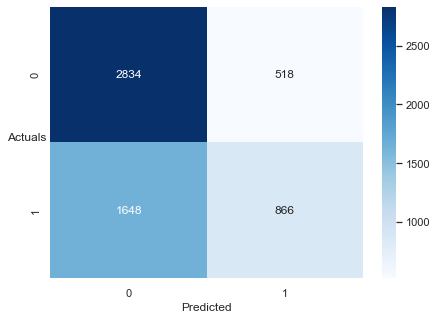

In [77]:
plt.figure(figsize=(7,5))
sns.heatmap((metrics.confusion_matrix(train_smote['default'],y_pred_train_smote)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print(classification_report(y_res, y_pred_train_smote))

In [78]:
# Prediction on the testing set
y_pred_test_smote = np.where(model_2.predict(test) > 0.5, 1, 0)

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      1002
         1.0       0.36      0.36      0.36       275

    accuracy                           0.72      1277
   macro avg       0.59      0.59      0.59      1277
weighted avg       0.72      0.72      0.72      1277



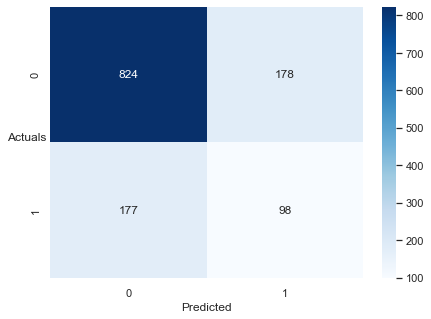

In [79]:
plt.figure(figsize=(7,5))
sns.heatmap((metrics.confusion_matrix(test['default'],y_pred_test_smote)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print(classification_report(y_test, y_pred_test_smote))

## Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [15, 30, 45],
    'n_estimators': [25, 50]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid)

In [81]:
grid_search.fit(X_res, y_res)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [82]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 15,
 'min_samples_split': 15,
 'n_estimators': 25}

In [83]:
best_grid = grid_search.best_estimator_

In [84]:
pred_train_rf = np.where(best_grid.predict(X_res)>0.5,1,0)

              precision    recall  f1-score   support

         0.0       0.68      0.92      0.78      3352
         1.0       0.80      0.43      0.56      2514

    accuracy                           0.71      5866
   macro avg       0.74      0.67      0.67      5866
weighted avg       0.73      0.71      0.69      5866



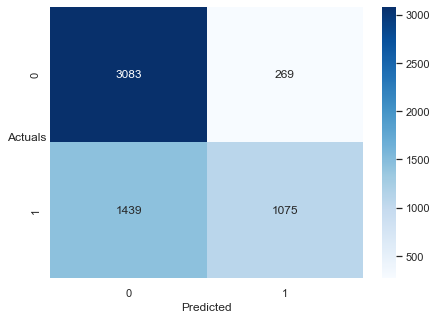

In [85]:
plt.figure(figsize=(7,5))
sns.heatmap((metrics.confusion_matrix(y_res,pred_train_rf)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print(metrics.classification_report(y_res, pred_train_rf))

In [86]:
pred_test_rf = np.where(best_grid.predict(X_test)>0.5,1,0)

              precision    recall  f1-score   support

         0.0       0.83      0.91      0.87      1002
         1.0       0.50      0.32      0.39       275

    accuracy                           0.78      1277
   macro avg       0.66      0.62      0.63      1277
weighted avg       0.76      0.78      0.77      1277



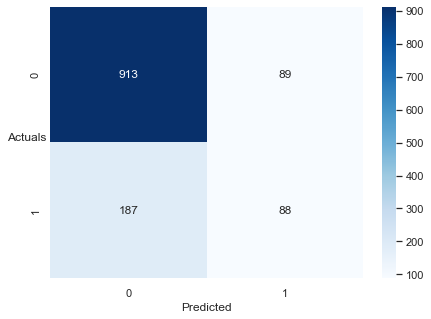

In [87]:
plt.figure(figsize=(7,5))
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_rf)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print(metrics.classification_report(y_test, pred_test_rf))

## Linear Discriminant Analysis

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [89]:
LDA = LinearDiscriminantAnalysis()

In [90]:
lda_model = LDA.fit(X_res, y_res)

In [91]:
pred_train_lda = lda_model.predict(X_res)

              precision    recall  f1-score   support

         0.0       0.63      0.85      0.72      3352
         1.0       0.63      0.34      0.44      2514

    accuracy                           0.63      5866
   macro avg       0.63      0.59      0.58      5866
weighted avg       0.63      0.63      0.60      5866



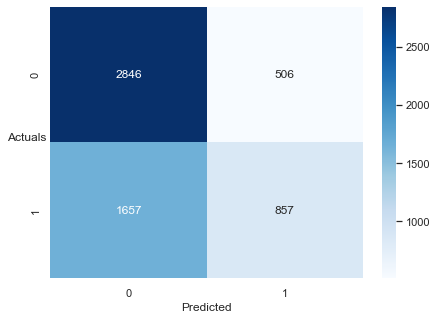

In [92]:
plt.figure(figsize=(7,5))
sns.heatmap((metrics.confusion_matrix(y_res,pred_train_lda)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print(metrics.classification_report(y_res, pred_train_lda))

In [93]:
pred_test_lda = lda_model.predict(X_test)

              precision    recall  f1-score   support

         0.0       0.82      0.83      0.83      1002
         1.0       0.36      0.36      0.36       275

    accuracy                           0.73      1277
   macro avg       0.59      0.59      0.59      1277
weighted avg       0.72      0.73      0.73      1277



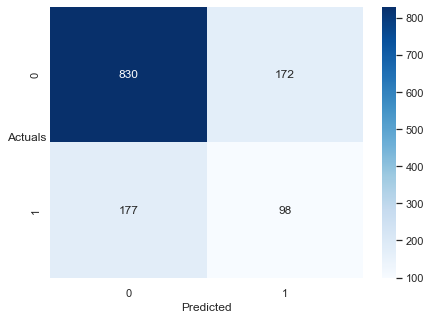

In [94]:
plt.figure(figsize=(7,5))
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_lda)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print(metrics.classification_report(y_test, pred_test_lda))

## Choosing the optimal threshold

In [95]:
pred_train_lda_prob = lda_model.predict_proba(X_res)[:,1]
pred_test_lda_prob = lda_model.predict_proba(X_test)[:,1]

In [96]:
fpr, tpr, thresholds = roc_curve(y_res,pred_train_lda_prob)

In [97]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.45243591581928677

In [98]:
y_class_pred_train=[]
for i in range(0,len(pred_train_lda_prob)):
    if np.array(pred_train_lda_prob)[i]>0.45:
        a=1
    else:
        a=0
    y_class_pred_train.append(a)

              precision    recall  f1-score   support

         0.0       0.64      0.75      0.69      3352
         1.0       0.57      0.45      0.50      2514

    accuracy                           0.62      5866
   macro avg       0.61      0.60      0.60      5866
weighted avg       0.61      0.62      0.61      5866



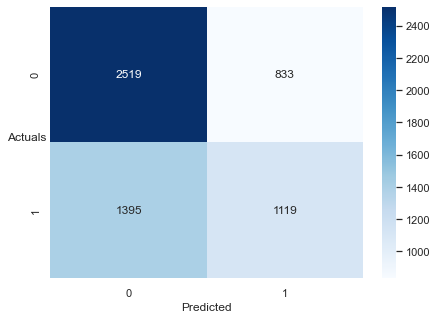

In [99]:
plt.figure(figsize=(7,5))
sns.heatmap((metrics.confusion_matrix(y_res,y_class_pred_train)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print(metrics.classification_report(y_res, y_class_pred_train))

In [100]:
y_class_pred_test=[]
for i in range(0,len(pred_test_lda_prob)):
    if np.array(pred_test_lda_prob)[i]>0.45:
        a=1
    else:
        a=0
    y_class_pred_test.append(a)

              precision    recall  f1-score   support

         0.0       0.82      0.73      0.77      1002
         1.0       0.30      0.42      0.35       275

    accuracy                           0.66      1277
   macro avg       0.56      0.58      0.56      1277
weighted avg       0.71      0.66      0.68      1277



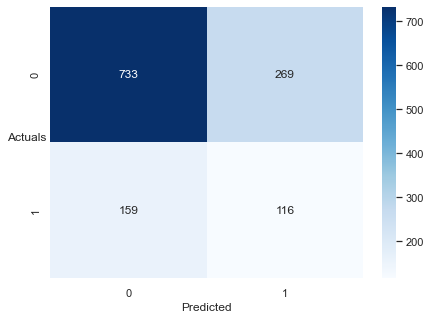

In [101]:
plt.figure(figsize=(7,5))
sns.heatmap((metrics.confusion_matrix(y_test, y_class_pred_test)),annot=True,fmt='.5g',cmap='Blues');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

print(metrics.classification_report(y_test, y_class_pred_test))

# Compare the performances of Logistics, Radom Forest and LDA models (include ROC Curve)
## Logistic Regression - AUC and ROC Curve for training data

AUC: 0.595


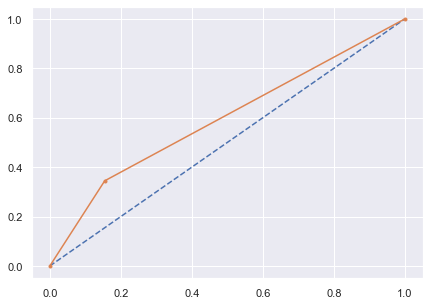

In [109]:
# accuracy score of the model
auc = roc_auc_score(y_res,y_pred_train_smote)
print('AUC: %.3f' % auc)
# calculate roc curve
plt.figure(figsize=(7,5))
fpr, tpr, thresholds = roc_curve(y_res,y_pred_train_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Logistic Regression - AUC and ROC Curve for testing data

AUC: 0.589


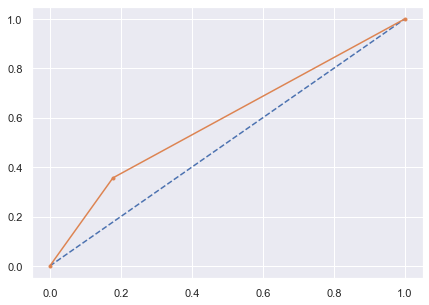

In [110]:
# accuracy score of the model
auc = roc_auc_score(y_test,y_pred_test_smote)
print('AUC: %.3f' % auc)
# calculate roc curve
plt.figure(figsize=(7,5))
fpr, tpr, thresholds = roc_curve(y_test,y_pred_test_smote)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Random Forest - AUC and ROC Curve for training data

AUC: 0.674


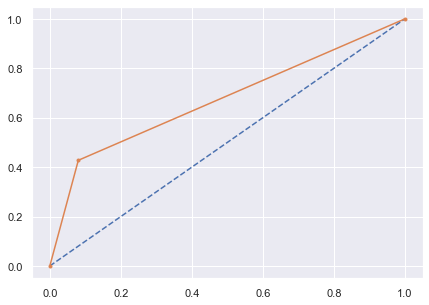

In [111]:
# accuracy score of the model
auc = roc_auc_score(y_res,pred_train_rf)
print('AUC: %.3f' % auc)
# calculate roc curve
plt.figure(figsize=(7,5))
fpr, tpr, thresholds = roc_curve(y_res,pred_train_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Random Forest - AUC and ROC Curve for testing data

AUC: 0.616


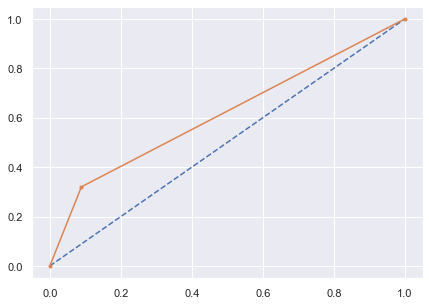

In [112]:
# accuracy score of the model
auc = roc_auc_score(y_test,pred_test_rf)
print('AUC: %.3f' % auc)
# calculate roc curve
plt.figure(figsize=(7,5))
fpr, tpr, thresholds = roc_curve(y_test,pred_test_rf)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Linear Discriminant Analysis - AUC and ROC Curve for training data

AUC: 0.595


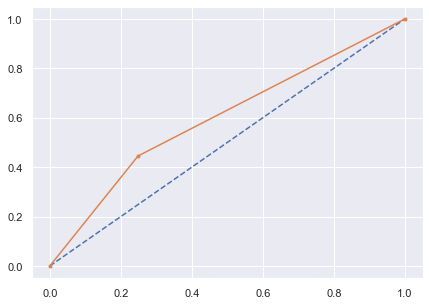

In [113]:
# accuracy score of the model
auc = roc_auc_score(y_res,pred_train_lda)
print('AUC: %.3f' % auc)
# calculate roc curve
plt.figure(figsize=(7,5))
fpr, tpr, thresholds = roc_curve(y_res,y_class_pred_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Linear Discriminant Analysis - AUC and ROC Curve for testing data

AUC: 0.592


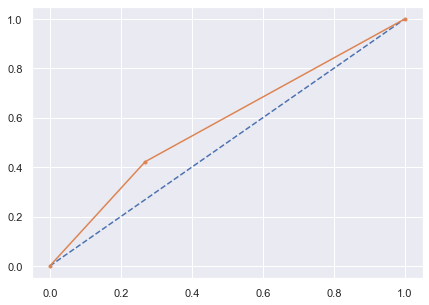

In [114]:
# accuracy score of the model
auc = roc_auc_score(y_test,pred_test_lda)
print('AUC: %.3f' % auc)
# calculate roc curve
plt.figure(figsize=(7,5))
fpr, tpr, thresholds = roc_curve(y_test,y_class_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

## Combined Result

In [121]:
data = [[0.63,0.72,0.71,0.78,0.62,0.66],[0.63,0.36,0.80,0.50,0.57,0.30],[0.34,0.36,0.43,0.32,0.45,0.42],[0.44,0.36,0.56,0.39,0.50,0.35],[0.60,0.59,0.67,0.61,0.60,0.59]]

In [122]:
cf = pd.DataFrame(data, columns = ['LR Train','LR Test','RF Train','RF Test','LDA Train','LDA Test'], index=['accuracy','precision','recall','f1score','auc_roc_score'])
cf

,LR Train,LR Test,RF Train,RF Test,LDA Train,LDA Test
accuracy,0.63,0.72,0.71,0.78,0.62,0.66
precision,0.63,0.36,0.80,0.50,0.57,0.30
recall,0.34,0.36,0.43,0.32,0.45,0.42
f1score,0.44,0.36,0.56,0.39,0.50,0.35
auc_roc_score,0.60,0.59,0.67,0.61,0.60,0.59


## Here, we can see that our recall score is not so good for the prediction so I would suggest to get more data and also that type of data which have significant columns in it but if we have to go with a model we could go with LDA one because of the highest recall score because in this recall score is the most important parameter not the accuracy. If I have to suggest something I would suggest that we should pay attention to our customers who are defaulting and should check their background and all properly and for the people who are paying properly we could give some schemes to them so that they start using more of our credit card for the defaulting one we should take strict measure and probably make them sign some papers regarding the time in which they will pay and if they delay we can increase their interest and if they fail to do so we can take spme legal action on them. 
